# Importing Libraries

In [624]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale,normalize
from sklearn.preprocessing import PowerTransformer
#from sklearn.

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

import scipy.stats as stats
from datetime import date, datetime

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold,cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import math

## Import Dataset

In [2]:
df = pd.read_csv("Car Data.csv")
df

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price
0,2019 Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000"
1,2017 Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000"
2,2017 Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000"
3,2020 Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000"
4,2020 Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
15876,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*
15877,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*
15878,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*
15879,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*"


### Data Wrangling

In [106]:
dfd1 = df.copy()
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price
0,2019 Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000"
1,2017 Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000"
2,2017 Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000"
3,2020 Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000"
4,2020 Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
15876,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*
15877,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*
15878,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*
15879,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*"


In [107]:
dfd1 = dfd1.dropna()
dfd1.isnull().sum()

Brand_Model         0
Manufacturing Yr    0
Engine              0
Transmission        0
Driven_kms          0
Fuel Type           0
No. Owners          0
Mileage             0
Power               0
Torque              0
location            0
Price               0
dtype: int64

In [108]:
dfd1 = dfd1.reset_index()

In [109]:
dfd1

,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price
0,0,2019 Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000"
1,1,2017 Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000"
2,2,2017 Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000"
3,3,2020 Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000"
4,4,2020 Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,15876,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*
15874,15877,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*
15875,15878,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*
15876,15879,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*"


In [110]:
dfd1 = dfd1.drop(["index"],axis=1)
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price
0,2019 Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000"
1,2017 Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000"
2,2017 Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000"
3,2020 Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000"
4,2020 Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
15873,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*
15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*
15875,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*
15876,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*"


In [111]:
x = []
for i in range(len(dfd1["Brand_Model"])):
    element = dfd1.iloc[i,0]
    if element[0]==" ":
        print(element.find(" "))
    x.append((dfd1.iloc[i,0][:dfd1.iloc[i,0].find(" ")]))
x = pd.DataFrame({"Brand_Model":x})

print(len(x))
x["Brand_Model"].unique()


15878


array(['2019', '2017', '2020', '2016', '2018', 'Maruti', 'Audi',
       'Hyundai', 'Skoda', 'Tata', 'Fiat', 'Volkswagen', 'Kia', 'Honda',
       'Ford', 'Mercedes-Benz', 'Toyota', 'Mahindra', 'Nissan',
       'Chevrolet', 'Renault', 'MG', 'Jeep', 'Volvo', 'BMW', 'Datsun',
       'Land', '2013', '2014', '2015', '2010', '2009', '2012', '2011',
       '2008', '2021', 'Mitsubishi', 'Porsche', 'Premier', 'Mini',
       'Jaguar', 'Isuzu', 'Ambassador', 'Bentley', 'Lexus', 'Maserati',
       'New', 'OpelCorsa', 'Aston', 'Force'], dtype=object)

In [112]:
for i in range(len(dfd1["Brand_Model"])):
    if dfd1["Brand_Model"][i][0]=='2':
        dfd1["Brand_Model"][i] = dfd1["Brand_Model"][i][5:]
    elif dfd1["Brand_Model"][i][:3]=='New':
        dfd1["Brand_Model"][i] = dfd1["Brand_Model"][i][4:]
    elif dfd1["Brand_Model"][i][0]==' ' or dfd1["Brand_Model"][i][:2]=='Na':
        dfd1.drop(i,inplace=True)
dfd1

<ipython-input-112-59b8f7316ddf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Brand_Model"][i] = dfd1["Brand_Model"][i][5:]
<ipython-input-112-59b8f7316ddf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Brand_Model"][i] = dfd1["Brand_Model"][i][4:]


,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price
0,Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000"
1,Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000"
2,Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000"
3,Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000"
4,Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
15873,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*
15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*
15875,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*
15876,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*"


In [113]:
dfd1 = dfd1.reset_index().drop("index",axis=1)
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price
0,Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000"
1,Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000"
2,Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000"
3,Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000"
4,Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
15873,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*
15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*
15875,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*
15876,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*"


In [114]:
brand_list = []
model_list = []

In [115]:
for i in range(len(dfd1["Brand_Model"])):
    element = dfd1.iloc[i,0]
    if element[:10]=="Land Rover":
        brand_list.append("Land Rover")
        model_list.append(element[11:])
    elif element[:12]=="Aston Martin":
        brand_list.append("Aston Martin")
        model_list.append(element[13:])
    else:
        brand_list.append(element[:element.find(" ")])
        model_list.append(element[element.find(" ")+1:])

print(brand_list)
print(model_list)

['Volkswagen', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Audi', 'Hyundai', 'Skoda', 'Hyundai', 'Maruti', 'Maruti', 'Tata', 'Fiat', 'Volkswagen', 'Hyundai', 'Kia', 'Honda', 'Volkswagen', 'Audi', 'Ford', 'Mercedes-Benz', 'Maruti', 'Volkswagen', 'Hyundai', 'Toyota', 'Mahindra', 'Nissan', 'Chevrolet', 'Maruti', 'Hyundai', 'Mahindra', 'Ford', 'Hyundai', 'Honda', 'Skoda', 'Ford', 'Maruti', 'Mercedes-Benz', 'Hyundai', 'Honda', 'Maruti', 'Maruti', 'Hyundai', 'Volkswagen', 'Maruti', 'Hyundai', 'Honda', 'Maruti', 'Maruti', 'Mahindra', 'Toyota', 'Maruti', 'Volkswagen', 'Toyota', 'Tata', 'Volkswagen', 'Ford', 'Toyota', 'Maruti', 'Honda', 'Volkswagen', 'Hyundai', 'Hyundai', 'Hyundai', 'Hyundai', 'Ford', 'Hyundai', 'Maruti', 'Honda', 'Toyota', 'Hyundai', 'Maruti', 'Maruti', 'Ford', 'Ford', 'Volkswagen', 'Honda', 'Hyundai', 'Hyundai', 'Hyundai', 'Hyundai', 'Maruti', 'Honda', 'Toyota', 'Honda', 'Honda', 'Ford', 'Volkswagen', 'Renault', 'Honda'

In [116]:
dfd1["Brand"] = brand_list
dfd1["Model"] = model_list

In [117]:
dfd1.drop("Brand_Model",axis=1)

,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15874,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15875,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15876,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [118]:
dfd1.nunique()

Brand_Model         2457
Manufacturing Yr      26
Engine               200
Transmission          43
Driven_kms          4946
Fuel Type              5
No. Owners             8
Mileage              549
Power                597
Torque               723
location              12
Price               1944
Brand                 35
Model               2457
dtype: int64

In [119]:
dfd1["Brand"].unique()

array(['Volkswagen', 'Maruti', 'Audi', 'Hyundai', 'Skoda', 'Tata', 'Fiat',
       'Kia', 'Honda', 'Ford', 'Mercedes-Benz', 'Toyota', 'Mahindra',
       'Nissan', 'Chevrolet', 'Renault', 'MG', 'Jeep', 'Volvo', 'BMW',
       'Datsun', 'Land Rover', 'Mitsubishi', 'Porsche', 'Premier', 'Mini',
       'Jaguar', 'Isuzu', 'Ambassador', 'Bentley', 'Lexus', 'Maserati',
       'OpelCorsa', 'Aston Martin', 'Force'], dtype=object)

In [728]:
dfd1["Manufacturing Yr"].unique()

array([2018, 2017, 2019, 2020, 2016, 2013, 2011, 2014, 2015, 2012, 2021,
       2010, 2006, 2009, 2008, 2007, 2004, 2005, 2002, 2000, 2003, 1981,
       1998, 1999])

In [120]:
for i in range(len(dfd1["Manufacturing Yr"])):
    dfd1["Manufacturing Yr"][i] = int(dfd1["Manufacturing Yr"][i])
dfd1 = dfd1.reset_index()
dfd1

dfd1.drop("index",axis=1,inplace=True)

<ipython-input-120-ab08db3d1ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Manufacturing Yr"][i] = int(dfd1["Manufacturing Yr"][i])


,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,15873,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15874,15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15875,15875,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15876,15876,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [122]:
ord(dfd1["Engine"][0][0])

49

In [123]:
dfd1["Engine"][0][dfd1["Engine"][i].find(" ")+1:]

'cc'

In [124]:
indexlist = []
for i in range(len(dfd1["Engine"])):
    temp = dfd1["Engine"][i]
    if temp[temp.find(" ")+1:]!='CC' and temp[temp.find(" ")+1:]!='cc':
        indexlist.append(i)
indexlist

[]

In [125]:
dfd1.iloc[indexlist]

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model


In [126]:
dfd1.drop(indexlist,inplace=True)
dfd1 = dfd1.reset_index()
dfd1

,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,Volkswagen Vento,2018,1498 cc,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,Maruti Baleno,2017,1197 cc,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,Maruti Wagon R,2017,998 cc,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,Maruti Swift Dzire,2019,1197 cc,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,Maruti Wagon R,2020,998 cc,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,15873,Tata Indigo Classic Dicor,2008,1396 CC,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15874,15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197 CC,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15875,15875,Maruti Swift VXI Deca,2016,1197 CC,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15876,15876,Maruti Baleno LXI,2004,1590 CC,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [127]:
for i in range(len(dfd1["Engine"])):
    temp = dfd1["Engine"][i]
    try:
        dfd1["Engine"][i] = int(temp[:temp.find(" ")])
    except:
        dfd1["Engine"].drop(i,inplace=True)
dfd1

<ipython-input-127-c90985cfa1b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Engine"][i] = int(temp[:temp.find(" ")])


,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,Volkswagen Vento,2018,1498,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,Maruti Baleno,2017,1197,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,Maruti Wagon R,2017,998,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,Maruti Swift Dzire,2019,1197,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,Maruti Wagon R,2020,998,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,15873,Tata Indigo Classic Dicor,2008,1396,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15874,15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15875,15875,Maruti Swift VXI Deca,2016,1197,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15876,15876,Maruti Baleno LXI,2004,1590,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [128]:
dfd1 = dfd1.reset_index()
dfd1

,level_0,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,0,Volkswagen Vento,2018,1498,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,1,Maruti Baleno,2017,1197,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,2,Maruti Wagon R,2017,998,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,3,Maruti Swift Dzire,2019,1197,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,4,Maruti Wagon R,2020,998,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,15873,15873,Tata Indigo Classic Dicor,2008,1396,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15874,15874,15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15875,15875,15875,Maruti Swift VXI Deca,2016,1197,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15876,15876,15876,Maruti Baleno LXI,2004,1590,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [129]:
dfd1.drop(["level_0","index"],axis=1,inplace=True)
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,Tata Indigo Classic Dicor,2008,1396,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15875,Maruti Swift VXI Deca,2016,1197,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15876,Maruti Baleno LXI,2004,1590,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [130]:
dfd1["Transmission"].unique()

array(['Manual', 'Automatic', 'KA53', 'KA04', 'KA03', 'KA51', 'KA05',
       'KA41', 'KA22', 'KA01', 'KA02', 'KA09', 'KA50', 'DL2C', 'UP16',
       'DL10', 'DL1C', 'HR87', 'DL5C', 'HR29', 'DL9C', 'HR26', 'DL3C',
       'TS08', 'TS10', 'RJ14', 'RJ45', 'RJ20', 'RJ43', 'RJ01', 'RJ23',
       'RJ10', 'MH02', 'MH47', 'MH01', 'MH05', 'MH43', 'MH04', 'MH03',
       'MH48', 'MH46', 'MH12', 'MH11'], dtype=object)

In [131]:
for i in range(len(dfd1["Transmission"])):
    if dfd1["Transmission"][i] not in ["Manual","Automatic"]:
        dfd1.drop(i,inplace=True)
dfd1 = dfd1.reset_index()

In [132]:
dfd1

,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,Volkswagen Vento,2018,1498,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,Maruti Baleno,2017,1197,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,Maruti Wagon R,2017,998,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,Maruti Swift Dzire,2019,1197,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,Maruti Wagon R,2020,998,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,15873,Tata Indigo Classic Dicor,2008,1396,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15746,15874,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15747,15875,Maruti Swift VXI Deca,2016,1197,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15748,15876,Maruti Baleno LXI,2004,1590,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [133]:
dfd1.drop(["index"],axis=1,inplace=True)
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,"98,027 Kms",Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,"34,706 Kms",Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,"41,220 Kms",Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,"9,379 Kms",Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,"10,412 Kms",Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,Tata Indigo Classic Dicor,2008,1396,Manual,"1,20,000 kms",Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15746,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,"40,000 kms",CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15747,Maruti Swift VXI Deca,2016,1197,Manual,"34,000 kms",Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15748,Maruti Baleno LXI,2004,1590,Manual,"60,000 kms",Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [134]:
dfd1["Driven_kms"][0][dfd1["Driven_kms"][0].find(" ")+1:]

'Kms'

In [135]:
indexlist = []
for i in range(len(dfd1["Driven_kms"])):
    temp = dfd1["Driven_kms"][i]
    if temp[temp.find(" ")+1:]=='kms' or temp[temp.find(" ")+1:]=='Kms':
        indexlist.append(i)

len(indexlist)

15750

In [136]:
for i in range(len(dfd1["Driven_kms"])):
    temp = dfd1["Driven_kms"][i]
    temp = temp.replace(",","")
    dfd1["Driven_kms"][i] = int(temp[:temp.find(" ")])
dfd1

<ipython-input-136-0383e7d19019>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Driven_kms"][i] = int(temp[:temp.find(" ")])


,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,1st Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,1st Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,1st Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,1st Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,1st Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15746,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,40000,CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15747,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15748,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [137]:
dfd1["Fuel Type"].unique()

array(['Diesel', 'Petrol', 'CNG', 'Electric', 'LPG'], dtype=object)

In [138]:
dfd1.isnull().sum()

Brand_Model         0
Manufacturing Yr    0
Engine              0
Transmission        0
Driven_kms          0
Fuel Type           0
No. Owners          0
Mileage             0
Power               0
Torque              0
location            0
Price               0
Brand               0
Model               0
dtype: int64

In [139]:
dfd1["No. Owners"].unique()

array(['1st Owner', 'First Owner', 'Second Owner', 'Third Owner',
       '2nd Owner', '3rd Owner', 'Fourth & Above Owner', 'Test Drive Car'],
      dtype=object)

In [140]:
if dfd1["No. Owners"][0] == "1st Owner":
    dfd1["No. Owners"][0] == "First Owner"
dfd1["No. Owners"][0]

'1st Owner'

In [141]:
for i in range(len(dfd1["No. Owners"])):
    if dfd1["No. Owners"][i] == '1st Owner':
        dfd1["No. Owners"][i] = "First Owner"
    elif dfd1["No. Owners"][i] == '2nd Owner':
        dfd1["No. Owners"][i] = "Second Owner"
    elif dfd1["No. Owners"][i] == '3rd Owner':
        dfd1["No. Owners"][i] = "Third Owner"
    
dfd1

<ipython-input-141-fba1d8ceeeb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["No. Owners"][i] = "First Owner"
<ipython-input-141-fba1d8ceeeb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["No. Owners"][i] = "Second Owner"
<ipython-input-141-fba1d8ceeeb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["No. Owners"][i] = "Third Owner"


,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,22.27 kmpl,108.6bhp,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,21.01 kmpl,81.80bhp,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,20.51 kmpl,67bhp,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,22 kmpl,81.80bhp,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,21.79 kmpl,67.05bhp,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,23.57 kmpl,70 bhp,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15746,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,40000,CNG,First Owner,0.0 km/kg,68.05 bhp,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15747,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,20.4 kmpl,81.80 bhp,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15748,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,15.4 kmpl,94 bhp,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [142]:
dfd1["No. Owners"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [143]:
x = []
for i in range(len(dfd1["Mileage"])):
    temp = dfd1["Mileage"][i]
    x.append(temp[temp.find(" "):])
x = pd.DataFrame({"Mileage":x})
x["Mileage"].unique()

array([' kmpl', ' km/kg', ' Professional', 'r', ' CC', ' km/hr', ' Owner',
       't'], dtype=object)

In [144]:
indexlist = []
for i in range(len(dfd1["Power"])):
    temp = dfd1["Power"][i]
    try:
        if "Bhp" in temp:
            dfd1["Power"][i] = float(temp[:temp.find("Bhp")].replace(" ",""))
        elif "bhp" in temp:
            dfd1["Power"][i] = float(temp[:temp.find("bhp")].replace(" ",""))
    except:
        indexlist.append(i)
indexlist

<ipython-input-144-2873007a96e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Power"][i] = float(temp[:temp.find("bhp")].replace(" ",""))
<ipython-input-144-2873007a96e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Power"][i] = float(temp[:temp.find("Bhp")].replace(" ",""))


[164,
 233,
 947,
 1327,
 1382,
 1412,
 1432,
 1436,
 1550,
 1579,
 1697,
 1706,
 1828,
 2058,
 2102,
 2108,
 2235,
 2258,
 2383,
 2504,
 2567,
 2595,
 2596,
 3864,
 3970,
 3991,
 4804,
 4878,
 4962,
 4963,
 5023,
 5139,
 5241,
 5300,
 5388,
 5467,
 5579,
 5671,
 5673,
 6892,
 6914,
 7046,
 7062,
 7132,
 7412,
 7457,
 7898,
 7911,
 7926,
 8093,
 8208,
 8463,
 8468,
 8486,
 8496,
 8562,
 9153,
 9558,
 9601,
 10042,
 10113,
 10284,
 11955,
 11993,
 12027,
 12028,
 12177,
 12714,
 12748,
 12941,
 12961,
 12962,
 13096,
 13154,
 13171,
 13234,
 13347,
 13464,
 13509,
 13510,
 13547,
 14807,
 14882,
 14896,
 14945,
 15034,
 15134,
 15142,
 15296,
 15382,
 15620]

In [145]:
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,22.27 kmpl,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,21.01 kmpl,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,20.51 kmpl,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,22 kmpl,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,21.79 kmpl,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,23.57 kmpl,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15746,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,40000,CNG,First Owner,0.0 km/kg,68.05,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15747,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,20.4 kmpl,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15748,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,15.4 kmpl,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [146]:
indexlist = []
for i in range(len(dfd1["Mileage"])):
    temp = dfd1["Mileage"][i]
    if temp[temp.find(" ")+1:]!='kmpl' and temp[temp.find(" ")+1:]!='km/kg':
        indexlist.append(i)
    elif 'kmpl' in temp:
        dfd1["Mileage"][i] = float(temp[:temp.find("kmpl")].replace(" ",""))
    elif 'km/kg' in temp:
        dfd1["Mileage"][i] = float(temp[:temp.find("km/kg")].replace(" ",""))
    elif 'km/hr' in temp:
        dfd1["Mileage"][i] = float(temp[:temp.find("km/hr")].replace(" ",""))
    
        

indexlist

<ipython-input-146-a3a93275d3cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Mileage"][i] = float(temp[:temp.find("kmpl")].replace(" ",""))
<ipython-input-146-a3a93275d3cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Mileage"][i] = float(temp[:temp.find("km/kg")].replace(" ",""))


[574,
 596,
 642,
 719,
 2718,
 2730,
 2754,
 2761,
 2815,
 2874,
 2889,
 2946,
 2998,
 3044,
 3090,
 3101,
 3132,
 3140,
 3143,
 3165,
 3220,
 3233,
 3278,
 3280,
 3311,
 5860,
 5871,
 5894,
 5898,
 5944,
 6000,
 6013,
 6063,
 6108,
 6120,
 6141,
 6222,
 6242,
 6257,
 6287,
 6305,
 6766,
 6789,
 6825,
 6890,
 6949,
 7034,
 7081,
 7127,
 7176,
 7190,
 7666,
 7925,
 8627,
 8636,
 8671,
 8731,
 8770,
 8802,
 8810,
 8812,
 8878,
 8886,
 8959,
 8967,
 10970,
 10982,
 11005,
 11013,
 11063,
 11230,
 11231,
 11243,
 11277,
 11279,
 11288,
 11296,
 11305,
 11331,
 11379,
 11403,
 11476,
 11534,
 13722,
 13735,
 13754,
 13760,
 13789,
 13861,
 13865,
 13927,
 13989,
 14008,
 14016,
 14019,
 14053,
 14065,
 14086,
 14096,
 14148,
 14150,
 14175,
 14188,
 14199,
 14243,
 14528,
 15429,
 15493]

In [147]:
dfd1.drop(indexlist,inplace=True)
dfd1 = dfd1.reset_index()
dfd1

,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,22.27,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,21.01,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,20.51,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,22,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,21.79,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15637,15745,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,23.57,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15638,15746,Hyundai Grand i10 Nios Sportz CNG,2020,1197,Manual,40000,CNG,First Owner,0,68.05,95.12Nm@ 4000rpm,Pune,7.5 Lakh*,Hyundai,Grand i10 Nios Sportz CNG
15639,15747,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,20.4,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15640,15748,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,15.4,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [148]:
for i in range(len(dfd1["Mileage"])):
    temp = dfd1["Mileage"][i]
    if temp==0:
        indexlist.append(i)
    elif dfd1["Fuel Type"][i]=="Diesel":
        dfd1["Mileage"][i] = 89.78/dfd1["Mileage"][i]
    elif dfd1["Fuel Type"][i]=="Petrol":
        dfd1["Mileage"][i] = 104.65/dfd1["Mileage"][i]
    elif dfd1["Fuel Type"][i]=="CNG":
        dfd1["Mileage"][i] = 49.4/dfd1["Mileage"][i]
    elif dfd1["Fuel Type"][i]=="LPG":
        dfd1["Mileage"][i] = 64.33/dfd1["Mileage"][i]
    

indexlist   

<ipython-input-148-c9c835992d45>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Mileage"][i] = 89.78/dfd1["Mileage"][i]
<ipython-input-148-c9c835992d45>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Mileage"][i] = 104.65/dfd1["Mileage"][i]
<ipython-input-148-c9c835992d45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Mileage"][i] = 49.4/dfd1["Mileage"][i]
<ipython-input-148-c9c835992d45>:12: SettingWithCopyWa

[574,
 596,
 642,
 719,
 2718,
 2730,
 2754,
 2761,
 2815,
 2874,
 2889,
 2946,
 2998,
 3044,
 3090,
 3101,
 3132,
 3140,
 3143,
 3165,
 3220,
 3233,
 3278,
 3280,
 3311,
 5860,
 5871,
 5894,
 5898,
 5944,
 6000,
 6013,
 6063,
 6108,
 6120,
 6141,
 6222,
 6242,
 6257,
 6287,
 6305,
 6766,
 6789,
 6825,
 6890,
 6949,
 7034,
 7081,
 7127,
 7176,
 7190,
 7666,
 7925,
 8627,
 8636,
 8671,
 8731,
 8770,
 8802,
 8810,
 8812,
 8878,
 8886,
 8959,
 8967,
 10970,
 10982,
 11005,
 11013,
 11063,
 11230,
 11231,
 11243,
 11277,
 11279,
 11288,
 11296,
 11305,
 11331,
 11379,
 11403,
 11476,
 11534,
 13722,
 13735,
 13754,
 13760,
 13789,
 13861,
 13865,
 13927,
 13989,
 14008,
 14016,
 14019,
 14053,
 14065,
 14086,
 14096,
 14148,
 14150,
 14175,
 14188,
 14199,
 14243,
 14528,
 15429,
 15493,
 120,
 220,
 230,
 316,
 326,
 779,
 884,
 931,
 943,
 974,
 1129,
 1193,
 1205,
 1214,
 1275,
 1323,
 1378,
 1546,
 1575,
 1693,
 1702,
 1824,
 1848,
 1889,
 2048,
 2054,
 2254,
 2301,
 2379,
 2591,
 2592

In [149]:
dfd1.drop(indexlist,inplace=True)
dfd1

,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,15744,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75nm@ 4000rpm,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15637,15745,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15639,15747,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15640,15748,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [150]:
dfd1 = dfd1.reset_index()
dfd1

,level_0,index,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,0,0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,1,1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,2,2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,3,3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,4,4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,15636,15744,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75nm@ 4000rpm,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15358,15637,15745,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15359,15639,15747,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15360,15640,15748,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [151]:
dfd1.drop(["level_0","index"],axis=1,inplace=True)
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75nm@ 4000rpm,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15358,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15359,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15360,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [152]:
dfd2 = dfd1.copy()

In [153]:
dfd1["Power"][0]

108.6

In [154]:
indexlist = []
for i in range(len(dfd1["Power"])):
    temp = dfd1["Power"][i]
    try:
        if "Bhp" in temp:
            dfd1["Power"][i] = float(temp[:temp.find("Bhp")].replace(" ",""))
        elif "bhp" in temp:
            dfd1["Power"][i] = float(temp[:temp.find("bhp")].replace(" ",""))
    except:
        indexlist.append(i)
indexlist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [155]:
dfd1.iloc[indexlist]

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75nm@ 4000rpm,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15358,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15359,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15360,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [156]:
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75nm@ 4000rpm,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15358,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15359,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15360,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [157]:
index_list = []
for i in range(len(dfd1["Torque"])):
    temp = dfd1["Torque"][i]
    if ("Nm" not in temp) and ("nm" not in temp) and ("kgm" not in temp) and ("KGM" not in temp) and ("NM" not in temp) and ("@" not in temp) and ("/" not in temp):
        index_list.append(i)
index_list

[163,
 230,
 393,
 446,
 605,
 1387,
 1407,
 1411,
 2068,
 2074,
 2201,
 2467,
 2530,
 2846,
 3772,
 3877,
 3896,
 4691,
 4765,
 4849,
 4850,
 4909,
 5025,
 5125,
 5184,
 5270,
 5347,
 5458,
 5551,
 6718,
 6866,
 6882,
 7222,
 7483,
 7704,
 7717,
 7731,
 7895,
 8009,
 8285,
 8360,
 8925,
 9327,
 9369,
 9806,
 9876,
 10046,
 11670,
 11707,
 11740,
 11741,
 11889,
 12409,
 12443,
 12632,
 12651,
 12652,
 12785,
 12842,
 12859,
 12922,
 13032,
 13148,
 13193,
 13230,
 14436,
 14511,
 14523,
 15002,
 15233]

In [158]:
dfd1.drop(index_list,inplace=True)
dfd1 = dfd1.reset_index()
dfd1.drop("index",axis=1,inplace=True)
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250Nm,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113Nm,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90Nm,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113Nm,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90Nm,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75nm@ 4000rpm,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15288,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140Nm@ 1800-3000rpm,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15289,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113Nm@ 4200rpm,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15290,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130Nm@ 3000rpm,Pune,"75,000*",Maruti,Baleno LXI


In [159]:
for i in range(len(dfd1["Torque"])):
    #try:
        temp = dfd1["Torque"][i]
        if "@" in temp:
            index = temp.find("@")
            if "Nm" in temp and index>temp.find("Nm"):
                dfd1["Torque"][i] = float(temp[:temp.find("Nm")].replace(" ",""))
            elif "nm" in temp and index>temp.find("nm"):
                dfd1["Torque"][i] = float(temp[:temp.find("nm")].replace(" ",""))
            elif "kgm" in temp and index>temp.find("kgm"):
                dfd1["Torque"][i] = float(temp[:temp.find("kgm")].replace(" ",""))
            elif "kg-m" in temp and index>temp.find("kg-m"):
                dfd1["Torque"][i] = float(temp[:temp.find("kg-m")].replace(" ",""))
            elif "KGM" in temp and index>temp.find("KGM"):
                dfd1["Torque"][i] = float(temp[:temp.find("KGM")].replace(" ",""))
            elif "NM" in temp and index>temp.find("NM"):
                dfd1["Torque"][i] = float(temp[:temp.find("NM")].replace(" ",""))
            elif "(" in temp and index>temp.find("("):
                dfd1["Torque"][i] = float(temp[:temp.find("(")].replace(" ",""))
            elif "@" in temp:
                dfd1["Torque"][i] = float(temp[:temp.find("@")].replace(" ",""))
            
        elif "Nm" in temp:
            dfd1["Torque"][i] = float(temp[:temp.find("Nm")].replace(" ",""))
        elif "nm" in temp:
            dfd1["Torque"][i] = float(temp[:temp.find("nm")].replace(" ",""))
        elif "kgm" in temp: 
            dfd1["Torque"][i] = float(temp[:temp.find("kgm")].replace(" ",""))
        elif "kg-m" in temp: 
            dfd1["Torque"][i] = float(temp[:temp.find("kg-m")].replace(" ",""))
        elif "KGM" in temp:
            dfd1["Torque"][i] = float(temp[:temp.find("KGM")].replace(" ",""))
        elif "NM" in temp:
            dfd1["Torque"][i] = float(temp[:temp.find("NM")].replace(" ",""))
        elif "/" in temp:
            dfd1["Torque"][i] = float(temp[:temp.find("/")].replace(" ",""))
        elif "(" in temp:
            dfd1["Torque"][i] = float(temp[:temp.find("(")].replace(" ",""))
    #except:
    #    print(i)
    #    break


<ipython-input-159-3fa5245c2f4a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Torque"][i] = float(temp[:temp.find("Nm")].replace(" ",""))
<ipython-input-159-3fa5245c2f4a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Torque"][i] = float(temp[:temp.find("nm")].replace(" ",""))
<ipython-input-159-3fa5245c2f4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Torque"][i] = float(temp[:temp.find("Nm")].replace(" 

In [160]:
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250,Ahmedabad,"6,99,000",Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113,Ahmedabad,"5,20,000",Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90,Ahmedabad,"4,25,000",Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113,Ahmedabad,"6,75,000",Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90,Ahmedabad,"4,80,000",Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75,Pune,4.9 Lakh*,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15288,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140,Pune,1.25 Lakh*,Tata,Indigo Classic Dicor
15289,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113,Pune,5.5 Lakh*,Maruti,Swift VXI Deca
15290,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130,Pune,"75,000*",Maruti,Baleno LXI


In [730]:
data_le.describe()

,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
count,15274.000000,15274.000000,15274.000000,1.527400e+04,15274.000000,15274.000000,15274.000000,15274.000000,15274.000000,15274.000000,1.527400e+04,15274.000000,15274.000000
mean,33.886801,1507.363232,0.728427,5.840424e+04,2.080202,0.454040,5.325351,107.505907,191.310501,5.895967,8.772578e+05,17.503274,1220.848501
std,3.117752,558.830979,0.444785,4.882398e+04,1.016744,0.932974,1.355649,51.872716,121.971085,3.329085,1.185838e+06,8.446008,733.670898
min,0.000000,624.000000,0.000000,2.070000e+02,0.000000,0.000000,1.372222,32.800000,4.800000,0.000000,2.800000e+04,0.000000,0.000000
25%,32.000000,1197.000000,0.000000,3.400000e+04,1.000000,0.000000,4.413963,77.000000,111.700000,3.000000,3.500000e+05,11.000000,550.250000
50%,34.000000,1248.000000,1.000000,5.500000e+04,3.000000,0.000000,5.265689,88.500000,151.000000,6.000000,5.200000e+05,20.000000,1203.000000
75%,36.000000,1598.000000,1.000000,7.500000e+04,3.000000,0.000000,5.980000,121.300000,242.000000,9.000000,8.500000e+05,20.000000,1879.000000
max,40.000000,5998.000000,1.000000,3.490000e+06,3.000000,4.000000,14.335616,626.000000,900.000000,11.000000,1.690000e+07,34.000000,2389.000000


In [161]:
index_list = []
for i in range(len(dfd1["Price"])):
    temp = dfd1["Price"][i]
    if ("Lakh*" not in temp) and ("Cr*" not in temp) and ("," not in temp):
        index_list.append(i)
index_list

[]

In [162]:
dfd2 = dfd1

In [163]:
indexlist = []
for i in range(len(dfd1["Price"])):
    temp = dfd1["Price"][i]
    try:
        if "Lakh" in temp:
            dfd1["Price"][i] = float(temp[:temp.find("Lakh")].replace(" ",""))
            dfd1["Price"][i] = dfd1["Price"][i]*100000
        elif "Cr" in temp:
            dfd1["Price"][i] = float(temp[:temp.find("Cr")].replace(" ",""))
            dfd1["Price"][i] = dfd1["Price"][i]*10000000
        elif "," in temp:
            dfd1["Price"][i] = int(temp.replace(",","").replace("*",""))
    except:
        indexlist.append(i)
indexlist

<ipython-input-163-794329d5e7d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Price"][i] = int(temp.replace(",","").replace("*",""))
<ipython-input-163-794329d5e7d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Price"][i] = float(temp[:temp.find("Lakh")].replace(" ",""))
<ipython-input-163-794329d5e7d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1["Price"][i] = dfd1["Price"][i]*100000
<ipython-input-163-79

[]

In [164]:
dfd2 = dfd1
dfd2

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250,Ahmedabad,699000,Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113,Ahmedabad,520000,Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90,Ahmedabad,425000,Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113,Ahmedabad,675000,Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90,Ahmedabad,480000,Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75,Pune,490000,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15288,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140,Pune,125000,Tata,Indigo Classic Dicor
15289,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113,Pune,550000,Maruti,Swift VXI Deca
15290,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130,Pune,75000,Maruti,Baleno LXI


In [165]:
dfd1 = dfd2.copy()
dfd1

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250,Ahmedabad,699000,Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113,Ahmedabad,520000,Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90,Ahmedabad,425000,Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113,Ahmedabad,675000,Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90,Ahmedabad,480000,Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75,Pune,490000,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15288,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140,Pune,125000,Tata,Indigo Classic Dicor
15289,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113,Pune,550000,Maruti,Swift VXI Deca
15290,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130,Pune,75000,Maruti,Baleno LXI


In [166]:
dfx = dfd1.copy()

In [167]:
for i in ["Manufacturing Yr","Engine","Driven_kms","Mileage","Power","Torque","Price"]:
    for j in range(len(dfx[i])):
        if isinstance(dfx[i][j], str):
            print(dfx[i][j])
            dfx.drop(j,inplace=True)
    dfx = dfx.reset_index()
    if 'index' in dfx.columns:
        dfx.drop("index",axis=1,inplace=True)

85ps
80 PS at 5200 rpm
80 PS at 5200 rpm
85ps
85ps
80 PS at 5200 rpm
118PS at 6,600 rpm
80 PS at 5200 rpm
80 PS at 5200 rpm
118PS at 6,600 rpm
80 PS at 5200 rpm
80 PS at 5200 rpm
171 PS
80 PS at 5200 rpm
118PS at 6,600 rpm
80 PS at 5200 rpm
80 PS at 5200 rpm
118PS at 6,600 rpm


In [168]:
dfx

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.03143,108.6,250,Ahmedabad,699000,Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.98096,81.8,113,Ahmedabad,520000,Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.10239,67,90,Ahmedabad,425000,Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.75682,81.8,113,Ahmedabad,675000,Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.80266,67.05,90,Ahmedabad,480000,Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.53704,81.86,113.75,Pune,490000,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15270,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.80908,70,140,Pune,125000,Tata,Indigo Classic Dicor
15271,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.1299,81.8,113,Pune,550000,Maruti,Swift VXI Deca
15272,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.79545,94,130,Pune,75000,Maruti,Baleno LXI


In [169]:
dfx[["Manufacturing Yr","Engine","Driven_kms","Mileage","Power","Torque","Price"]] = dfx[["Manufacturing Yr","Engine","Driven_kms","Mileage","Power","Torque","Price"]].apply(pd.to_numeric)
dfx

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.031432,108.60,250.00,Ahmedabad,699000.0,Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.980961,81.80,113.00,Ahmedabad,520000.0,Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.102389,67.00,90.00,Ahmedabad,425000.0,Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.756818,81.80,113.00,Ahmedabad,675000.0,Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.802662,67.05,90.00,Ahmedabad,480000.0,Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.537037,81.86,113.75,Pune,490000.0,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15270,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.809079,70.00,140.00,Pune,125000.0,Tata,Indigo Classic Dicor
15271,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.129902,81.80,113.00,Pune,550000.0,Maruti,Swift VXI Deca
15272,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.795455,94.00,130.00,Pune,75000.0,Maruti,Baleno LXI


In [170]:
dfx["Price"] = dfx["Price"].astype(int)
dfx

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,2018,1498,Manual,98027,Diesel,First Owner,4.031432,108.60,250.00,Ahmedabad,699000,Volkswagen,Vento
1,Maruti Baleno,2017,1197,Manual,34706,Petrol,First Owner,4.980961,81.80,113.00,Ahmedabad,520000,Maruti,Baleno
2,Maruti Wagon R,2017,998,Automatic,41220,Petrol,First Owner,5.102389,67.00,90.00,Ahmedabad,425000,Maruti,Wagon R
3,Maruti Swift Dzire,2019,1197,Manual,9379,Petrol,First Owner,4.756818,81.80,113.00,Ahmedabad,675000,Maruti,Swift Dzire
4,Maruti Wagon R,2020,998,Manual,10412,Petrol,First Owner,4.802662,67.05,90.00,Ahmedabad,480000,Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,Hyundai Grand i10 1.2 Kappa Sportz BSIV,2017,1197,Manual,42967,Petrol,First Owner,5.537037,81.86,113.75,Pune,490000,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15270,Tata Indigo Classic Dicor,2008,1396,Manual,120000,Diesel,Fourth & Above Owner,3.809079,70.00,140.00,Pune,125000,Tata,Indigo Classic Dicor
15271,Maruti Swift VXI Deca,2016,1197,Manual,34000,Petrol,First Owner,5.129902,81.80,113.00,Pune,550000,Maruti,Swift VXI Deca
15272,Maruti Baleno LXI,2004,1590,Manual,60000,Petrol,Third Owner,6.795455,94.00,130.00,Pune,75000,Maruti,Baleno LXI


In [171]:
min_var = min(dfx["Manufacturing Yr"])
for i in range(len(dfx["Manufacturing Yr"])):
    dfx["Manufacturing Yr"][i] = dfx["Manufacturing Yr"][i]-min_var
dfx

<ipython-input-171-8ca6d65b8e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["Manufacturing Yr"][i] = dfx["Manufacturing Yr"][i]-min_var


,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,37,1498,Manual,98027,Diesel,First Owner,4.031432,108.60,250.00,Ahmedabad,699000,Volkswagen,Vento
1,Maruti Baleno,36,1197,Manual,34706,Petrol,First Owner,4.980961,81.80,113.00,Ahmedabad,520000,Maruti,Baleno
2,Maruti Wagon R,36,998,Automatic,41220,Petrol,First Owner,5.102389,67.00,90.00,Ahmedabad,425000,Maruti,Wagon R
3,Maruti Swift Dzire,38,1197,Manual,9379,Petrol,First Owner,4.756818,81.80,113.00,Ahmedabad,675000,Maruti,Swift Dzire
4,Maruti Wagon R,39,998,Manual,10412,Petrol,First Owner,4.802662,67.05,90.00,Ahmedabad,480000,Maruti,Wagon R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,Hyundai Grand i10 1.2 Kappa Sportz BSIV,36,1197,Manual,42967,Petrol,First Owner,5.537037,81.86,113.75,Pune,490000,Hyundai,Grand i10 1.2 Kappa Sportz BSIV
15270,Tata Indigo Classic Dicor,27,1396,Manual,120000,Diesel,Fourth & Above Owner,3.809079,70.00,140.00,Pune,125000,Tata,Indigo Classic Dicor
15271,Maruti Swift VXI Deca,35,1197,Manual,34000,Petrol,First Owner,5.129902,81.80,113.00,Pune,550000,Maruti,Swift VXI Deca
15272,Maruti Baleno LXI,23,1590,Manual,60000,Petrol,Third Owner,6.795455,94.00,130.00,Pune,75000,Maruti,Baleno LXI


In [172]:
for column in dfx.columns:
    print(column," : ",dfx[column].unique(),"\n")

Brand_Model  :  ['Volkswagen Vento' 'Maruti Baleno' 'Maruti Wagon R' ...
 'Tata Indigo Classic Dicor' 'Maruti Swift VXI Deca' 'Maruti Baleno LXI'] 

Manufacturing Yr  :  [37 36 38 39 35 32 30 33 34 31 40 29 25 28 27 26 23 24 21 19 22  0 17 18] 

Engine  :  [1498 1197  998 1196 1248 1373 1968 1798 1396 1497 1199 1582 1353 1496
 2143 2755 2184 1461 1991 1995 1493 1598 3198 2359  814 1198  796 2179
 2982 1399 1591 1061 1186 1086 1999 2494 1451 1956 2987  799 1969 1462
 1368 2523 1998  624 2393 2354  999 1985 2953 2993 2199 2967 2696 1364
 3471 1997 1996 1599 1984 1499 1120 1047 2498 4806 1172 1173 1896 1586
 2400 1298 2609 2499 3498 1797 1395 2477 1796 4395 1993 2148 3628 1950
 1794 5000 2198 2835 1799 1495  995 1948 1596 2487 2771 2773 2197 1468
 1597 1341  936 2362 2694 2979 1194 2996 2999 2995 1405 2496 1388 1422
 1193 2998 5461 1988 4461 4951 3436 4134 3956 5998 4663 1595 3189 4999
 2497 2489  993 2231 1150  793 1339 3456 1299 1589 2956 2157 4735 2200
 2997 1108 3630 2656 1390 2776 29

In [173]:
dfx.nunique()

Brand_Model         2390
Manufacturing Yr      24
Engine               149
Transmission           2
Driven_kms          4682
Fuel Type              4
No. Owners             5
Mileage              635
Power                438
Torque               268
location              12
Price               1587
Brand                 35
Model               2390
dtype: int64

## Encoding

In [174]:
df1 = dfx.copy()

In [175]:
le = LabelEncoder()

In [176]:
data_le = df1.copy()
for column in ["Transmission","Fuel Type","No. Owners","Brand","Model","location"]:
    data_le[column] = le.fit_transform(data_le[column])
data_le

,Brand_Model,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
0,Volkswagen Vento,37,1498,1,98027,1,0,4.031432,108.60,250.00,0,699000,33,1932
1,Maruti Baleno,36,1197,1,34706,3,0,4.980961,81.80,113.00,0,520000,20,234
2,Maruti Wagon R,36,998,0,41220,3,0,5.102389,67.00,90.00,0,425000,20,2060
3,Maruti Swift Dzire,38,1197,1,9379,3,0,4.756818,81.80,113.00,0,675000,20,1768
4,Maruti Wagon R,39,998,1,10412,3,0,4.802662,67.05,90.00,0,480000,20,2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,Hyundai Grand i10 1.2 Kappa Sportz BSIV,36,1197,1,42967,3,0,5.537037,81.86,113.75,11,490000,11,999
15270,Tata Indigo Classic Dicor,27,1396,1,120000,1,1,3.809079,70.00,140.00,11,125000,31,1096
15271,Maruti Swift VXI Deca,35,1197,1,34000,3,0,5.129902,81.80,113.00,11,550000,20,1833
15272,Maruti Baleno LXI,23,1590,1,60000,3,4,6.795455,94.00,130.00,11,75000,20,247


In [177]:
["Transmission","Fuel Type","Manufacturing Yr","No. Owners","Brand","Model"]

['Transmission',
 'Fuel Type',
 'Manufacturing Yr',
 'No. Owners',
 'Brand',
 'Model']

In [178]:
data_le.drop(["Brand_Model"],axis=1,inplace=True)

In [179]:
data_le.corr()

,Manufacturing Yr,Engine,Transmission,Driven_kms,Fuel Type,No. Owners,Mileage,Power,Torque,location,Price,Brand,Model
Manufacturing Yr,1.000000,-0.091644,-0.099273,-0.352047,-0.003208,-0.322154,-0.200482,0.010561,0.089613,0.006284,0.300479,0.050836,-0.060229
Engine,-0.091644,1.000000,-0.475299,0.132952,-0.423801,0.120296,0.556245,0.867457,0.801321,0.009231,0.597899,0.009331,-0.057404
Transmission,-0.099273,-0.475299,1.000000,0.059135,0.131560,-0.059427,-0.343491,-0.602668,-0.537496,-0.017490,-0.516451,0.111364,0.132157
Driven_kms,-0.352047,0.132952,0.059135,1.000000,-0.213759,0.148521,0.012749,0.019409,0.061630,-0.025804,-0.128899,0.041345,0.028639
Fuel Type,-0.003208,-0.423801,0.131560,-0.213759,1.000000,-0.048330,0.359275,-0.272399,-0.580552,0.001537,-0.216229,-0.036472,-0.047300
No. Owners,-0.322154,0.120296,-0.059427,0.148521,-0.048330,1.000000,0.123976,0.085957,0.038984,-0.041708,-0.037479,-0.010687,0.017837
Mileage,-0.200482,0.556245,-0.343491,0.012749,0.359275,0.123976,1.000000,0.548460,0.255826,0.001613,0.324766,0.008199,-0.055487
Power,0.010561,0.867457,-0.602668,0.019409,-0.272399,0.085957,0.548460,1.000000,0.851230,0.016642,0.748273,-0.144517,-0.094416
Torque,0.089613,0.801321,-0.537496,0.061630,-0.580552,0.038984,0.255826,0.851230,1.000000,0.011375,0.688187,-0.078741,-0.034247
location,0.006284,0.009231,-0.017490,-0.025804,0.001537,-0.041708,0.001613,0.016642,0.011375,1.000000,0.000708,0.002889,-0.004325


## EDA

## Transformation

In [180]:
data_le["Engine"]

0        1498
1        1197
2         998
3        1197
4         998
         ... 
15269    1197
15270    1396
15271    1197
15272    1590
15273    1798
Name: Engine, Length: 15274, dtype: int64

In [237]:
categorical_columns = ["Manufacturing Yr","Transmission","Fuel Type","No. Owners","Brand","Model","location"]
X = data_le.drop(categorical_columns,axis=1)
X = X.drop(["Price","Engine"],axis=1)
column = X.columns
transformer=PowerTransformer(standardize=True)
X = transformer.fit_transform(X)
X=pd.DataFrame(X,columns=column)
X["Engine"] = scale(data_le["Engine"])
X

,Driven_kms,Mileage,Power,Torque,Engine
0,1.104072,-0.970304,0.379949,0.678501,-0.016756
1,-0.547853,-0.188554,-0.404703,-0.577764,-0.555398
2,-0.316845,-0.094957,-1.052643,-0.891549,-0.911510
3,-1.890572,-0.364851,-0.404703,-0.577764,-0.555398
4,-1.805968,-0.328410,-1.050059,-0.891549,-0.911510
...,...,...,...,...,...
15269,-0.258820,0.229837,-0.402477,-0.568355,-0.555398
15270,1.508087,-1.167974,-0.903051,-0.264412,-0.199285
15271,-0.574465,-0.073929,-0.404703,-0.577764,-0.555398
15272,0.242492,1.092706,-0.001340,-0.374824,0.147879


In [238]:
X.isnull().sum()

Driven_kms    0
Mileage       0
Power         0
Torque        0
Engine        0
dtype: int64

In [239]:
data_pf = X.copy()
data_pf[categorical_columns] = data_le[categorical_columns]
data_pf["Price"] = data_le["Price"]
data_pf

,Driven_kms,Mileage,Power,Torque,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price
0,1.104072,-0.970304,0.379949,0.678501,-0.016756,37,1,1,0,33,1932,0,699000
1,-0.547853,-0.188554,-0.404703,-0.577764,-0.555398,36,1,3,0,20,234,0,520000
2,-0.316845,-0.094957,-1.052643,-0.891549,-0.911510,36,0,3,0,20,2060,0,425000
3,-1.890572,-0.364851,-0.404703,-0.577764,-0.555398,38,1,3,0,20,1768,0,675000
4,-1.805968,-0.328410,-1.050059,-0.891549,-0.911510,39,1,3,0,20,2060,0,480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,-0.258820,0.229837,-0.402477,-0.568355,-0.555398,36,1,3,0,11,999,11,490000
15270,1.508087,-1.167974,-0.903051,-0.264412,-0.199285,27,1,1,1,31,1096,11,125000
15271,-0.574465,-0.073929,-0.404703,-0.577764,-0.555398,35,1,3,0,20,1833,11,550000
15272,0.242492,1.092706,-0.001340,-0.374824,0.147879,23,1,3,4,20,247,11,75000


In [240]:
data_pf.corr()

,Driven_kms,Mileage,Power,Torque,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price
Driven_kms,1.000000,-0.026708,0.054637,0.082047,0.161276,-0.533374,0.103968,-0.309442,0.215645,0.050437,0.064756,-0.032021,-0.227349
Mileage,-0.026708,1.000000,0.490400,0.143338,0.521414,-0.197833,-0.331956,0.398914,0.117667,-0.000676,-0.053072,-0.002453,0.299831
Power,0.054637,0.490400,1.000000,0.746346,0.817866,0.042011,-0.561806,-0.323270,0.071753,-0.145350,-0.054604,0.019188,0.609835
Torque,0.082047,0.143338,0.746346,1.000000,0.701474,0.161048,-0.467548,-0.592993,-0.004887,-0.048650,-0.033987,0.014323,0.587679
Engine,0.161276,0.521414,0.817866,0.701474,1.000000,-0.091644,-0.475299,-0.423801,0.120296,0.009331,-0.057404,0.009231,0.597899
Manufacturing Yr,-0.533374,-0.197833,0.042011,0.161048,-0.091644,1.000000,-0.099273,-0.003208,-0.322154,0.050836,-0.060229,0.006284,0.300479
Transmission,0.103968,-0.331956,-0.561806,-0.467548,-0.475299,-0.099273,1.000000,0.131560,-0.059427,0.111364,0.132157,-0.017490,-0.516451
Fuel Type,-0.309442,0.398914,-0.323270,-0.592993,-0.423801,-0.003208,0.131560,1.000000,-0.048330,-0.036472,-0.047300,0.001537,-0.216229
No. Owners,0.215645,0.117667,0.071753,-0.004887,0.120296,-0.322154,-0.059427,-0.048330,1.000000,-0.010687,0.017837,-0.041708,-0.037479
Brand,0.050437,-0.000676,-0.145350,-0.048650,0.009331,0.050836,0.111364,-0.036472,-0.010687,1.000000,0.079537,0.002889,-0.075351


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:265: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


<AxesSubplot:>

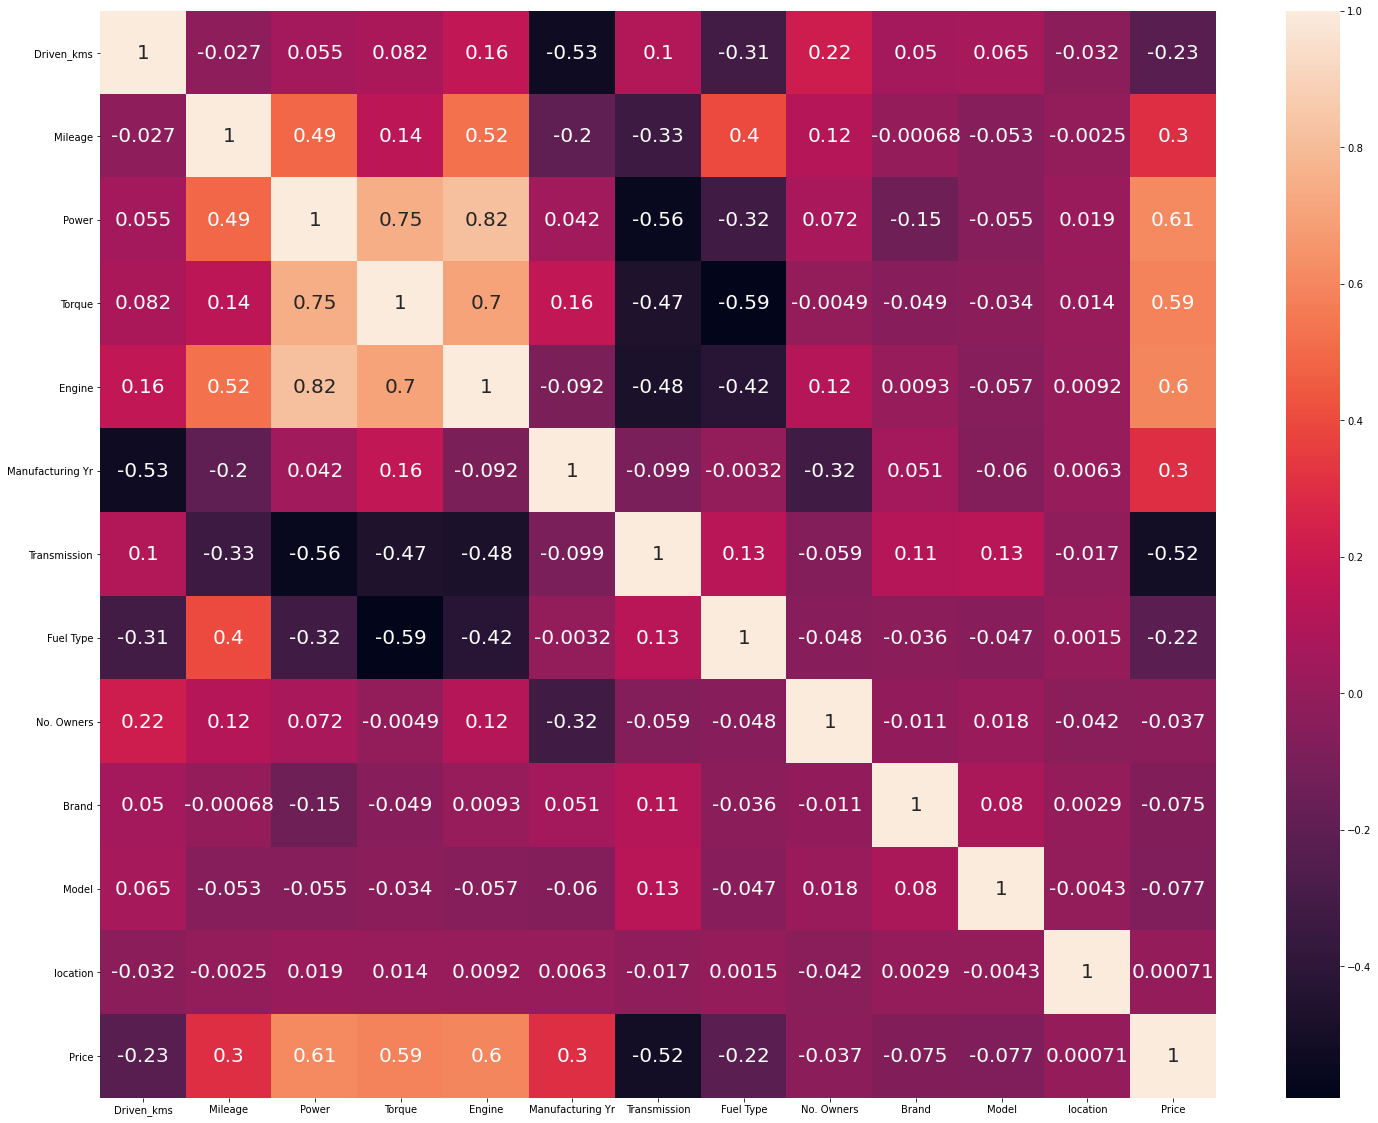

In [241]:
plt.figure(figsize=(25,20))
sns.heatmap(data_pf.corr(),annot=True,annot_kws={"Size":20})


In [242]:
data_pf.describe()

,Driven_kms,Mileage,Power,Torque,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price
count,1.527400e+04,1.527400e+04,1.527400e+04,1.527400e+04,1.527400e+04,15274.000000,15274.000000,15274.000000,15274.000000,15274.000000,15274.000000,15274.000000,1.527400e+04
mean,-6.541005e-16,-2.648864e-16,-2.215823e-15,-6.974183e-16,-3.649111e-16,33.886801,0.728427,2.080202,0.454040,17.503274,1220.848501,5.895967,8.772578e+05
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,3.117752,0.444785,1.016744,0.932974,8.446008,733.670898,3.329085,1.185838e+06
min,-3.495954e+00,-3.928382e+00,-4.202028e+00,-3.548591e+00,-1.580786e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000e+04
25%,-5.744654e-01,-6.439828e-01,-5.920915e-01,-5.941837e-01,-5.553976e-01,32.000000,0.000000,1.000000,0.000000,11.000000,550.250000,3.000000,3.500000e+05
50%,1.057222e-01,2.889894e-02,-1.717236e-01,-1.494577e-01,-4.641327e-01,34.000000,1.000000,3.000000,0.000000,20.000000,1203.000000,6.000000,5.200000e+05
75%,6.144433e-01,5.457632e-01,6.481895e-01,6.217038e-01,1.621953e-01,36.000000,1.000000,3.000000,0.000000,20.000000,1879.000000,9.000000,8.500000e+05
max,1.560727e+01,4.876784e+00,2.969764e+00,3.348680e+00,8.036032e+00,40.000000,1.000000,3.000000,4.000000,34.000000,2389.000000,11.000000,1.690000e+07


### VIF

In [243]:
X = add_constant(data_pf)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

const               237.776204
Driven_kms            1.723199
Mileage               4.370393
Power                 4.731691
Torque                3.744927
Engine                6.066190
Manufacturing Yr      1.894266
Transmission          1.634545
Fuel Type             4.316230
No. Owners            1.140325
Brand                 1.127346
Model                 1.036008
location              1.005048
Price                 2.314177
dtype: float64

# EDA

## Univariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

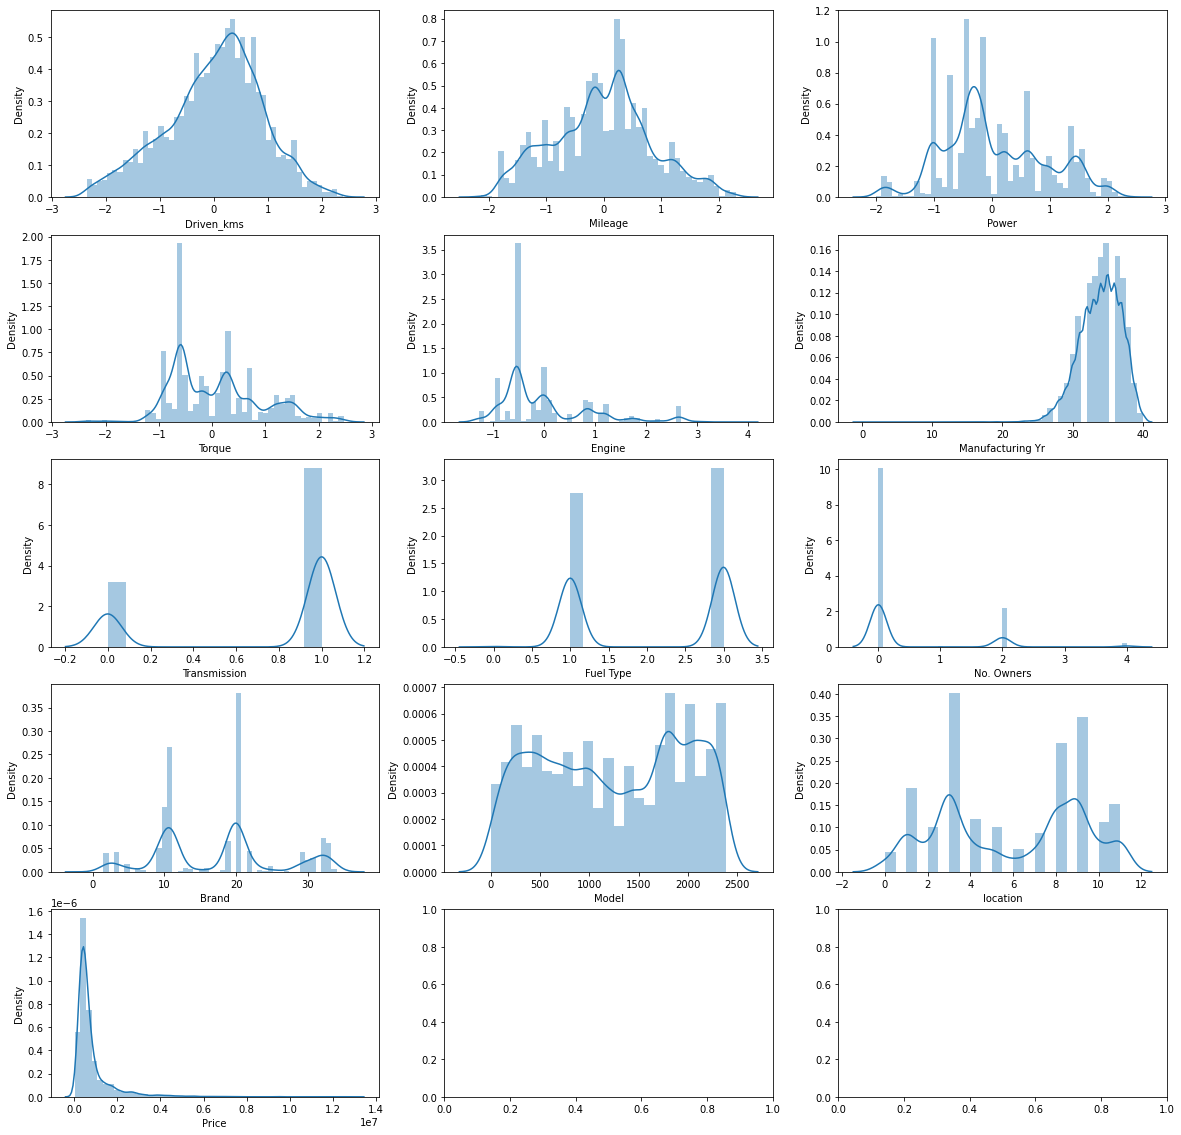

In [563]:
fig, axes = plt.subplots(5,3,figsize=(20,20))
for i, column in enumerate(data_pf.columns):
    sns.distplot(data_pf[column],ax=axes[i//3,i%3],label=column)

#### Categorical  colums

In [245]:
categorical_columns

['Manufacturing Yr',
 'Transmission',
 'Fuel Type',
 'No. Owners',
 'Brand',
 'Model',
 'location']

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/osux/an

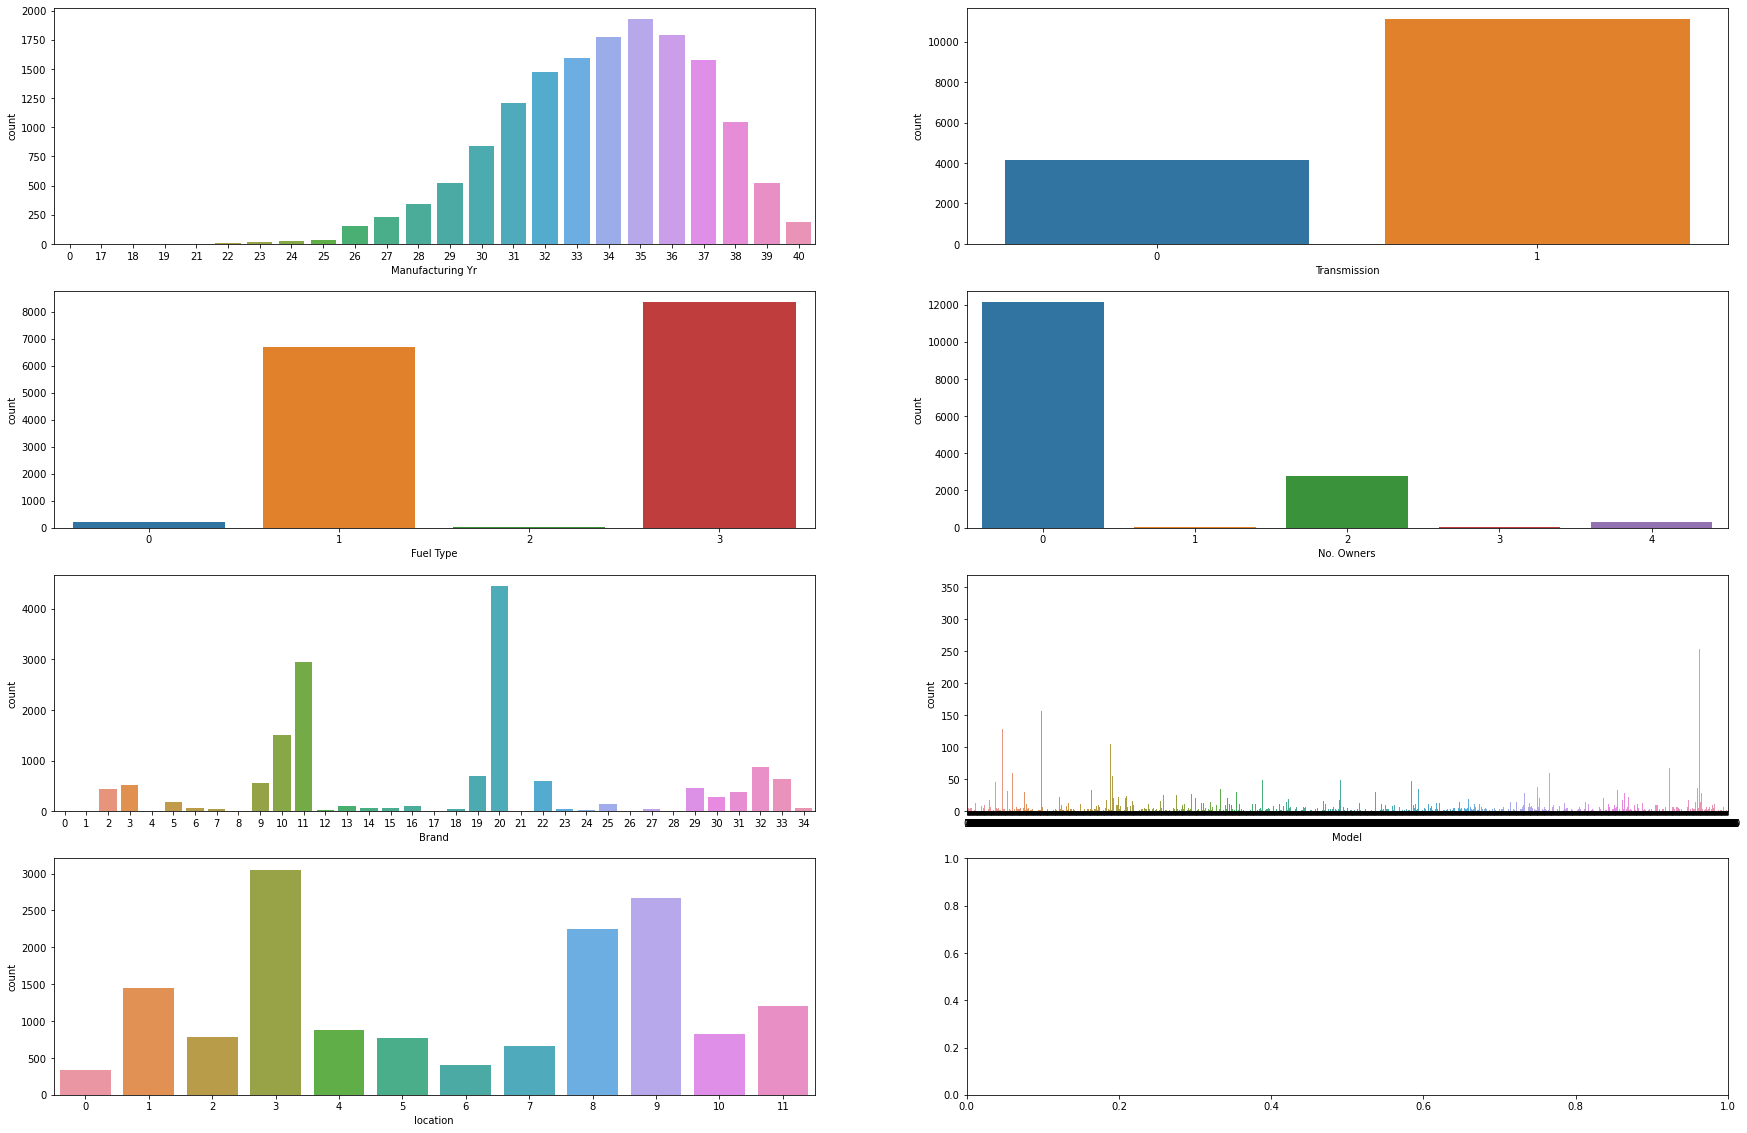

In [246]:
fig, axes = plt.subplots(4,2,figsize=(30,20))
for i in range(len(data_le[categorical_columns].columns)):
    sns.countplot(data_le[categorical_columns[i]],ax=axes[i//2,i%2],label=categorical_columns[i], font)

### Boxplot for Outliers

In [247]:
data_pf

,Driven_kms,Mileage,Power,Torque,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price
0,1.104072,-0.970304,0.379949,0.678501,-0.016756,37,1,1,0,33,1932,0,699000
1,-0.547853,-0.188554,-0.404703,-0.577764,-0.555398,36,1,3,0,20,234,0,520000
2,-0.316845,-0.094957,-1.052643,-0.891549,-0.911510,36,0,3,0,20,2060,0,425000
3,-1.890572,-0.364851,-0.404703,-0.577764,-0.555398,38,1,3,0,20,1768,0,675000
4,-1.805968,-0.328410,-1.050059,-0.891549,-0.911510,39,1,3,0,20,2060,0,480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,-0.258820,0.229837,-0.402477,-0.568355,-0.555398,36,1,3,0,11,999,11,490000
15270,1.508087,-1.167974,-0.903051,-0.264412,-0.199285,27,1,1,1,31,1096,11,125000
15271,-0.574465,-0.073929,-0.404703,-0.577764,-0.555398,35,1,3,0,20,1833,11,550000
15272,0.242492,1.092706,-0.001340,-0.374824,0.147879,23,1,3,4,20,247,11,75000


In [248]:
continuous_columns = []
for column in data_pf.columns:
    if column not in categorical_columns:
        continuous_columns.append(column)
del continuous_columns[-1]
continuous_columns

['Driven_kms', 'Mileage', 'Power', 'Torque', 'Engine']

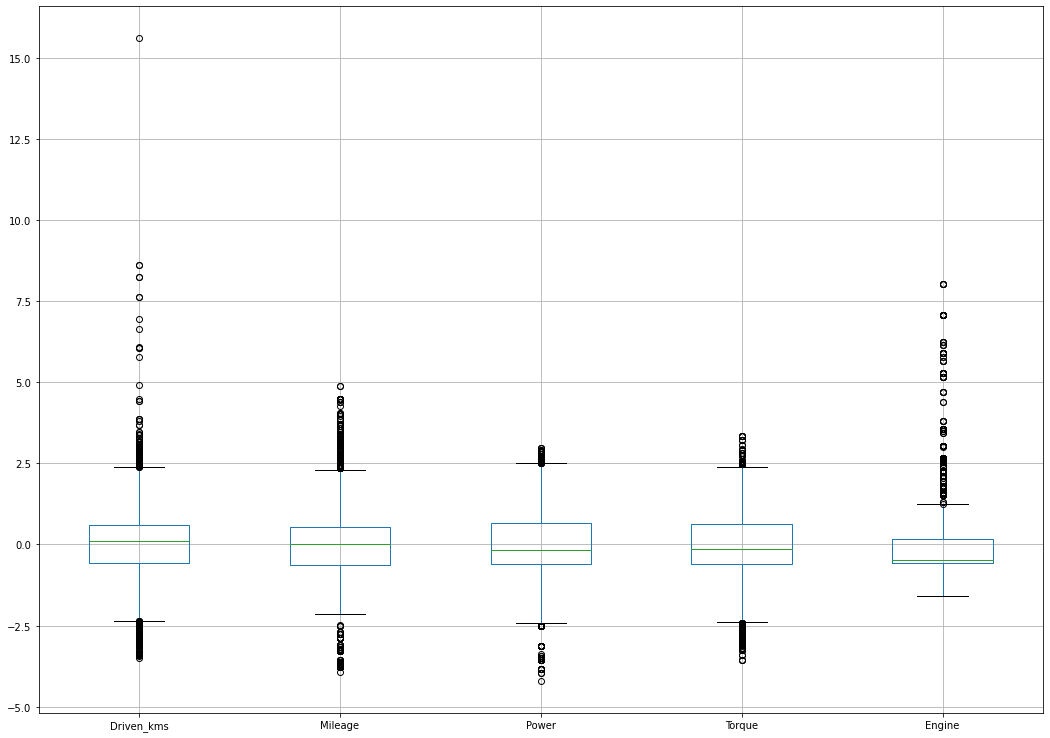

In [249]:
boxplot = data_pf[continuous_columns].boxplot(column=continuous_columns,figsize=(18,13))

In [250]:
df = data_pf[["Engine","Driven_kms","Mileage","Power","Torque"]]
def find_outliers_limit(df,col):
    print('-'*50)
    print(col)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= df[(df[col]<=upper) & (df[col]>=lower)]
    return(final)
outlier_cols=df.columns
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df=remove_outlier(df,col,upper,lower)


--------------------------------------------------
Engine
Percentiles: 25th=-0.555, 75th=0.162, IQR=0.718
Lower: -1.6317869216976055  Upper: 1.238584567794941
Identified outliers: 1365
Non-outlier observations: 13909
--------------------------------------------------
Driven_kms
Percentiles: 25th=-0.594, 75th=0.568, IQR=1.162
Lower: -2.3374729292368577  Upper: 2.3108157881347857
Identified outliers: 314
Non-outlier observations: 13595
--------------------------------------------------
Mileage
Percentiles: 25th=-0.681, 75th=0.395, IQR=1.076
Lower: -2.2948654918265006  Upper: 2.008626135466238
Identified outliers: 288
Non-outlier observations: 13307
--------------------------------------------------
Power
Percentiles: 25th=-0.719, 75th=0.550, IQR=1.270
Lower: -2.6241730460388966  Upper: 2.455282872657708
Identified outliers: 53
Non-outlier observations: 13254
--------------------------------------------------
Torque
Percentiles: 25th=-0.594, 75th=0.331, IQR=0.925
Lower: -1.982347313340670

In [251]:
data_pf.isnull().sum()

Driven_kms          0
Mileage             0
Power               0
Torque              0
Engine              0
Manufacturing Yr    0
Transmission        0
Fuel Type           0
No. Owners          0
Brand               0
Model               0
location            0
Price               0
dtype: int64

In [252]:
X = data_pf[["Driven_kms","Mileage","Power","Torque"]]
X

,Driven_kms,Mileage,Power,Torque
0,1.104072,-0.970304,0.379949,0.678501
1,-0.547853,-0.188554,-0.404703,-0.577764
2,-0.316845,-0.094957,-1.052643,-0.891549
3,-1.890572,-0.364851,-0.404703,-0.577764
4,-1.805968,-0.328410,-1.050059,-0.891549
...,...,...,...,...
15269,-0.258820,0.229837,-0.402477,-0.568355
15270,1.508087,-1.167974,-0.903051,-0.264412
15271,-0.574465,-0.073929,-0.404703,-0.577764
15272,0.242492,1.092706,-0.001340,-0.374824


In [253]:
def find_outliers_limit(df,col):
    print('-'*50)
    print(col)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= df[(df[col]<=upper) & (df[col]>=lower)]
    return(final)
outlier_cols=X.columns
for col in outlier_cols:
    lower,upper=find_outliers_limit(X,col)
    X=remove_outlier(X,col,upper,lower)


--------------------------------------------------
Driven_kms
Percentiles: 25th=-0.574, 75th=0.614, IQR=1.189
Lower: -2.3578285288246774  Upper: 2.397806350617117
Identified outliers: 350
Non-outlier observations: 14924
--------------------------------------------------
Mileage
Percentiles: 25th=-0.649, 75th=0.546, IQR=1.195
Lower: -2.4421255726999718  Upper: 2.3384964944181754
Identified outliers: 375
Non-outlier observations: 14549
--------------------------------------------------
Power
Percentiles: 25th=-0.520, 75th=0.642, IQR=1.162
Lower: -2.262598632798734  Upper: 2.385395561917008
Identified outliers: 348
Non-outlier observations: 14201
--------------------------------------------------
Torque
Percentiles: 25th=-0.578, 75th=0.643, IQR=1.221
Lower: -2.4091551733563494  Upper: 2.474553316954418
Identified outliers: 429
Non-outlier observations: 13772


In [254]:
X

,Driven_kms,Mileage,Power,Torque
0,1.104072,-0.970304,0.379949,0.678501
1,-0.547853,-0.188554,-0.404703,-0.577764
2,-0.316845,-0.094957,-1.052643,-0.891549
3,-1.890572,-0.364851,-0.404703,-0.577764
4,-1.805968,-0.328410,-1.050059,-0.891549
...,...,...,...,...
15269,-0.258820,0.229837,-0.402477,-0.568355
15270,1.508087,-1.167974,-0.903051,-0.264412
15271,-0.574465,-0.073929,-0.404703,-0.577764
15272,0.242492,1.092706,-0.001340,-0.374824


In [255]:
data_pf[X.columns] = X[X.columns]
data_pf.dropna(inplace=True)
data_pf.reset_index(inplace=True)
data_pf.drop("index",axis=1,inplace=True)
data_pf

,Driven_kms,Mileage,Power,Torque,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price
0,1.104072,-0.970304,0.379949,0.678501,-0.016756,37,1,1,0,33,1932,0,699000
1,-0.547853,-0.188554,-0.404703,-0.577764,-0.555398,36,1,3,0,20,234,0,520000
2,-0.316845,-0.094957,-1.052643,-0.891549,-0.911510,36,0,3,0,20,2060,0,425000
3,-1.890572,-0.364851,-0.404703,-0.577764,-0.555398,38,1,3,0,20,1768,0,675000
4,-1.805968,-0.328410,-1.050059,-0.891549,-0.911510,39,1,3,0,20,2060,0,480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,-0.258820,0.229837,-0.402477,-0.568355,-0.555398,36,1,3,0,11,999,11,490000
13768,1.508087,-1.167974,-0.903051,-0.264412,-0.199285,27,1,1,1,31,1096,11,125000
13769,-0.574465,-0.073929,-0.404703,-0.577764,-0.555398,35,1,3,0,20,1833,11,550000
13770,0.242492,1.092706,-0.001340,-0.374824,0.147879,23,1,3,4,20,247,11,75000


<AxesSubplot:>

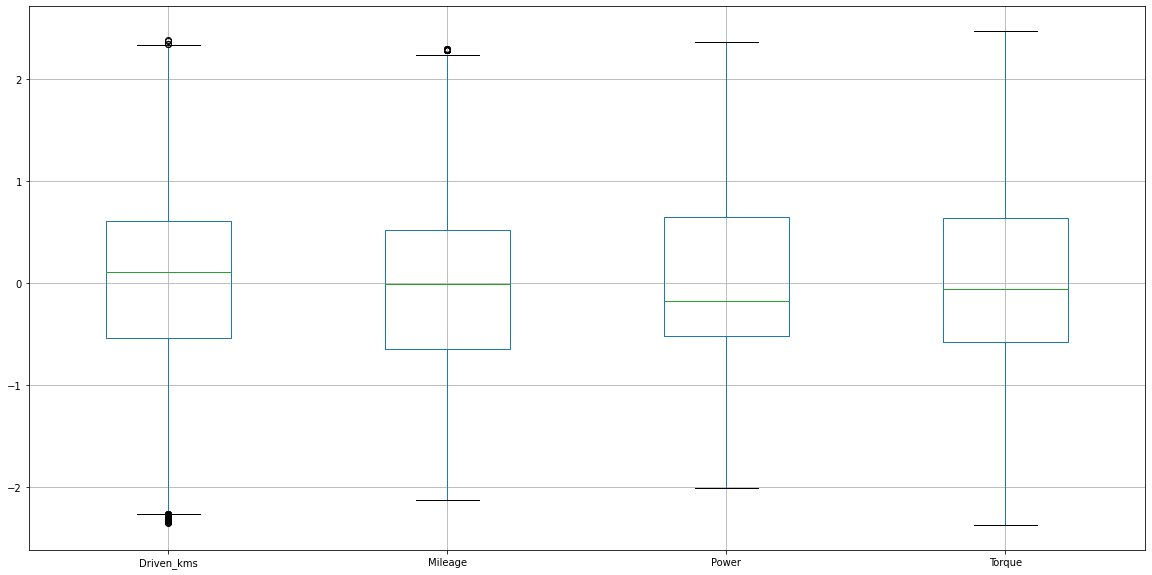

In [256]:
plt.figure(figsize=(20,10))
X[outlier_cols].boxplot()


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:265: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


<AxesSubplot:>

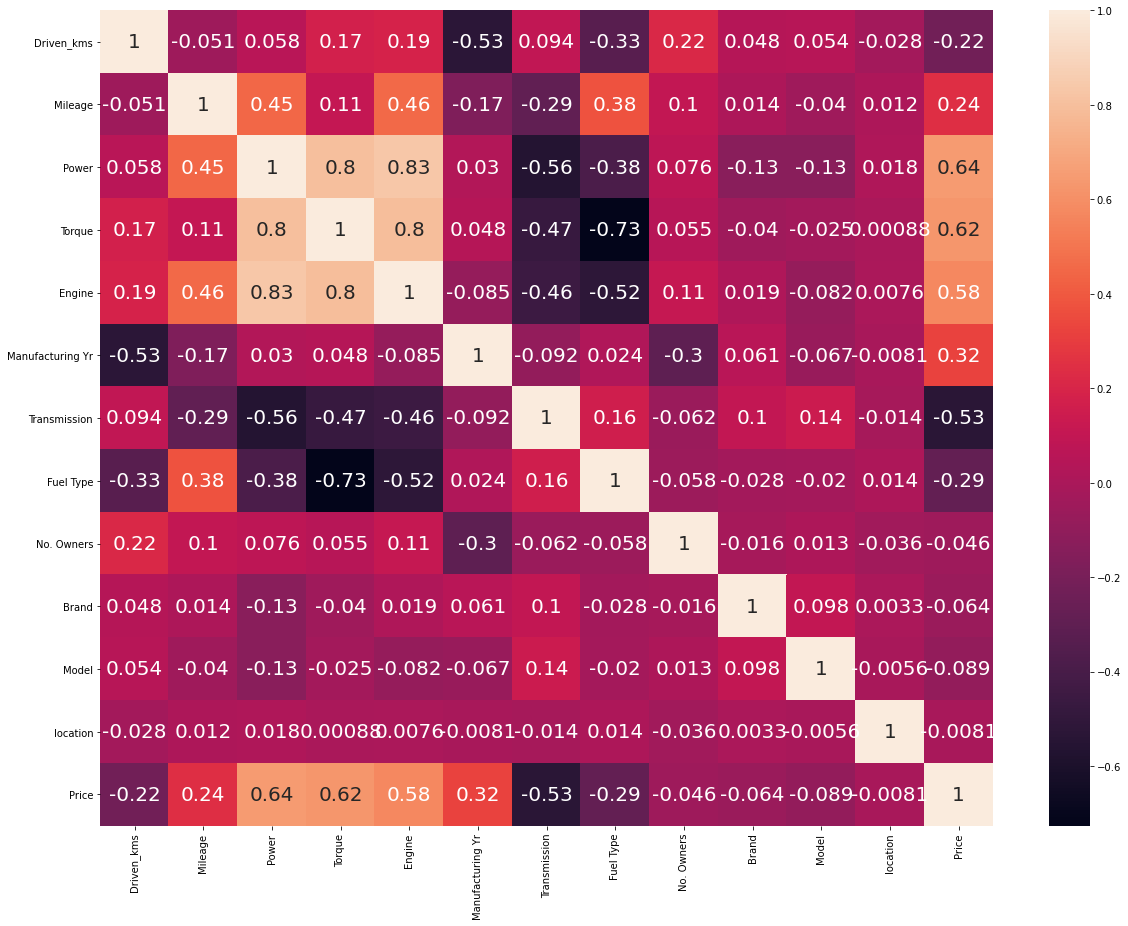

In [257]:

plt.figure(figsize=(20,15))
sns.heatmap(data_pf.corr(),annot=True,annot_kws={"Size":20})


In [258]:
data_pf = data_pf.dropna()
data_pf.isnull().sum()

Driven_kms          0
Mileage             0
Power               0
Torque              0
Engine              0
Manufacturing Yr    0
Transmission        0
Fuel Type           0
No. Owners          0
Brand               0
Model               0
location            0
Price               0
dtype: int64

In [259]:
pow_tor = []
for i in range(len(data_pf)):
    pow_tor.append(data_pf["Power"][i]+data_pf["Torque"][i])
data_pf["pow_tor"] = pow_tor
data_pf

,Driven_kms,Mileage,Power,Torque,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price,pow_tor
0,1.104072,-0.970304,0.379949,0.678501,-0.016756,37,1,1,0,33,1932,0,699000,1.058450
1,-0.547853,-0.188554,-0.404703,-0.577764,-0.555398,36,1,3,0,20,234,0,520000,-0.982468
2,-0.316845,-0.094957,-1.052643,-0.891549,-0.911510,36,0,3,0,20,2060,0,425000,-1.944192
3,-1.890572,-0.364851,-0.404703,-0.577764,-0.555398,38,1,3,0,20,1768,0,675000,-0.982468
4,-1.805968,-0.328410,-1.050059,-0.891549,-0.911510,39,1,3,0,20,2060,0,480000,-1.941609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,-0.258820,0.229837,-0.402477,-0.568355,-0.555398,36,1,3,0,11,999,11,490000,-0.970832
13768,1.508087,-1.167974,-0.903051,-0.264412,-0.199285,27,1,1,1,31,1096,11,125000,-1.167463
13769,-0.574465,-0.073929,-0.404703,-0.577764,-0.555398,35,1,3,0,20,1833,11,550000,-0.982468
13770,0.242492,1.092706,-0.001340,-0.374824,0.147879,23,1,3,4,20,247,11,75000,-0.376164


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:265: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


<AxesSubplot:>

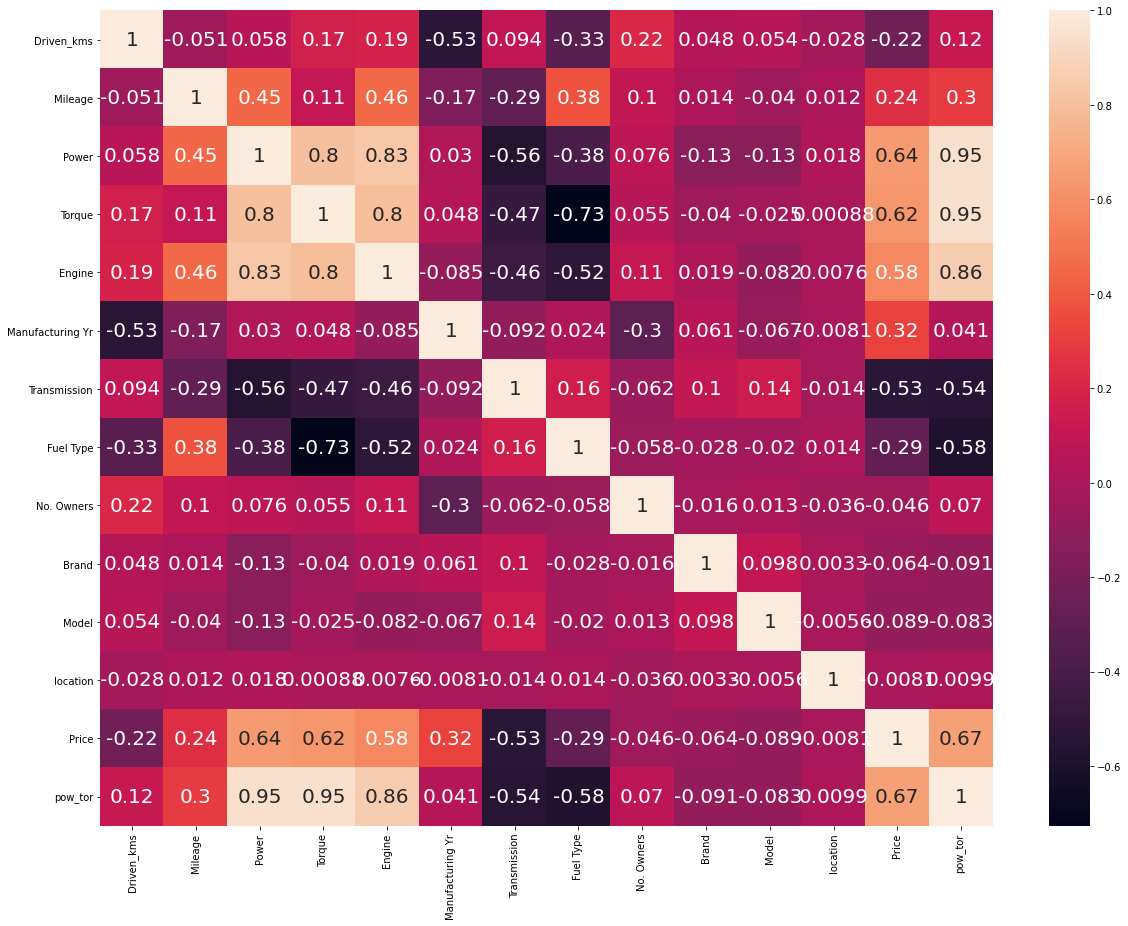

In [260]:

plt.figure(figsize=(20,15))
sns.heatmap(data_pf.corr(),annot=True,annot_kws={"Size":20})


In [261]:
data_pf.isnull().sum()

Driven_kms          0
Mileage             0
Power               0
Torque              0
Engine              0
Manufacturing Yr    0
Transmission        0
Fuel Type           0
No. Owners          0
Brand               0
Model               0
location            0
Price               0
pow_tor             0
dtype: int64

In [262]:
data_pf = data_pf.dropna()

In [263]:
data_pf = data_pf.reset_index()
data_pf2 = data_pf.drop(["Power","Torque"],axis=1)
data_pf2

,index,Driven_kms,Mileage,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price,pow_tor
0,0,1.104072,-0.970304,-0.016756,37,1,1,0,33,1932,0,699000,1.058450
1,1,-0.547853,-0.188554,-0.555398,36,1,3,0,20,234,0,520000,-0.982468
2,2,-0.316845,-0.094957,-0.911510,36,0,3,0,20,2060,0,425000,-1.944192
3,3,-1.890572,-0.364851,-0.555398,38,1,3,0,20,1768,0,675000,-0.982468
4,4,-1.805968,-0.328410,-0.911510,39,1,3,0,20,2060,0,480000,-1.941609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,13767,-0.258820,0.229837,-0.555398,36,1,3,0,11,999,11,490000,-0.970832
13768,13768,1.508087,-1.167974,-0.199285,27,1,1,1,31,1096,11,125000,-1.167463
13769,13769,-0.574465,-0.073929,-0.555398,35,1,3,0,20,1833,11,550000,-0.982468
13770,13770,0.242492,1.092706,0.147879,23,1,3,4,20,247,11,75000,-0.376164


In [264]:
data_pf.drop("index",axis=1,inplace=True)
data_pf2.drop("index",axis=1,inplace=True)
data_pf2

,Driven_kms,Mileage,Engine,Manufacturing Yr,Transmission,Fuel Type,No. Owners,Brand,Model,location,Price,pow_tor
0,1.104072,-0.970304,-0.016756,37,1,1,0,33,1932,0,699000,1.058450
1,-0.547853,-0.188554,-0.555398,36,1,3,0,20,234,0,520000,-0.982468
2,-0.316845,-0.094957,-0.911510,36,0,3,0,20,2060,0,425000,-1.944192
3,-1.890572,-0.364851,-0.555398,38,1,3,0,20,1768,0,675000,-0.982468
4,-1.805968,-0.328410,-0.911510,39,1,3,0,20,2060,0,480000,-1.941609
...,...,...,...,...,...,...,...,...,...,...,...,...
13767,-0.258820,0.229837,-0.555398,36,1,3,0,11,999,11,490000,-0.970832
13768,1.508087,-1.167974,-0.199285,27,1,1,1,31,1096,11,125000,-1.167463
13769,-0.574465,-0.073929,-0.555398,35,1,3,0,20,1833,11,550000,-0.982468
13770,0.242492,1.092706,0.147879,23,1,3,4,20,247,11,75000,-0.376164


<AxesSubplot:>

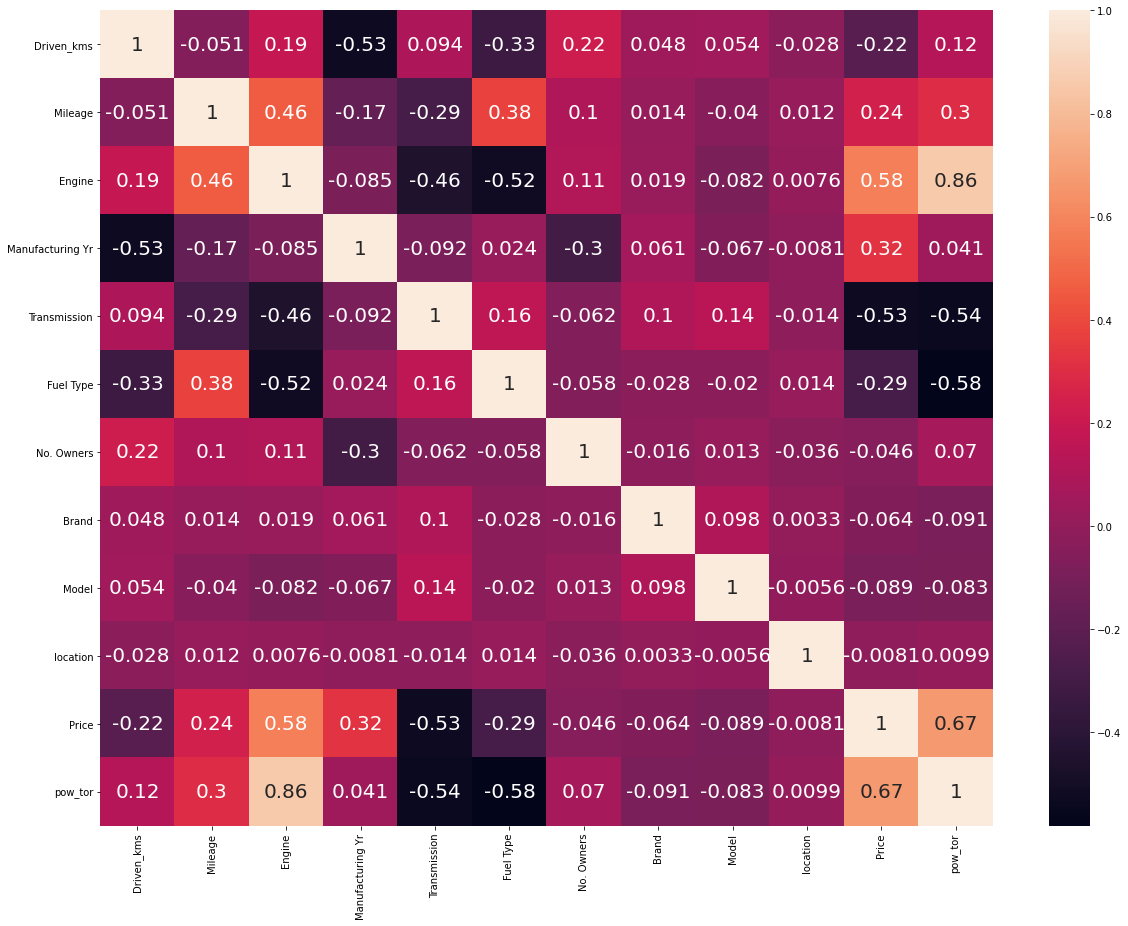

In [266]:
plt.figure(figsize=(20,15))
sns.heatmap(data_pf2.corr(),annot=True,annot_kws={"Size":20})

In [268]:
X = add_constant(data_pf2)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

const               261.321965
Driven_kms            1.735771
Mileage               4.108722
Engine                6.772463
Manufacturing Yr      1.778653
Transmission          1.623554
Fuel Type             4.945069
No. Owners            1.122394
Brand                 1.097192
Model                 1.046319
location              1.005007
Price                 2.457071
pow_tor               5.977144
dtype: float64

<AxesSubplot:xlabel='PCA2', ylabel='Price'>

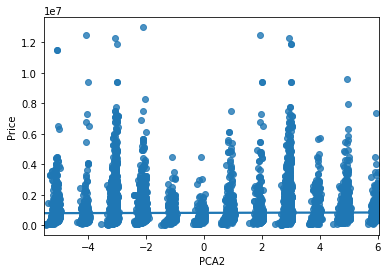

In [277]:
sns.regplot(x = data_pca["PCA2"],
            y = data_pca["Price"], 
            ci = None)

## Splitting Training Testing Dataset

In [297]:
X=data_pf.drop(["Price"],axis=1)
y=data_pf["Price"]

In [282]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [287]:
#score_min = float('inf')
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test, y_pred)
    if score>score_max:
        score_max = score
        index = i
    #print(score)
print (score_max)
index

0.9678456335377209


30

In [313]:
X=data_pf.drop(["Price"],axis=1)
y=np.log(data_pf["Price"])

In [314]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [315]:
#score_min = float('inf')
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test, y_pred)
    if score>score_max:
        score_max = score
        index = i
    #print(score)
print (score_max)
index

0.9575444042922164


46

### Linear Regression

In [394]:
X=data_pf.drop("Price",axis=1)
y=data_pf["Price"]

In [395]:
model = LinearRegression()

In [396]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [397]:
score_max = float("-inf")
lr_index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = np.sqrt(mean_squared_error(y_test,y_pred))
    #score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        lr_index = i
    #print(score)
print (score_max)
lr_index

0.5086723302231279


15

In [398]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=lr_index)

In [399]:
#model = DecisionTreeRegressor()
model.fit(X_train, y_train)    

LinearRegression()

In [400]:
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test)
score

0.5086723302231279

In [401]:
y_pred

array([1308929.16524759,  852097.08811365,  112589.81854936, ...,
        715272.44844317, 2194351.93524104,   89532.04867958])

In [402]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

529757.2185869323

In [403]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=42)

In [404]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.59607123, 0.57415432, 0.59035466, 0.60085118])

In [405]:
print(np.mean(scores),np.std(scores))

0.5903578466450311 0.010066119040319463


In [406]:
print(mean_absolute_error(y_test,y_pred))
mean_squared_error(y_test,abs(y_pred))

341048.67808593175


259587885209.09647

In [407]:
X=data_pf.drop("Price",axis=1)
y=np.log(data_pf["Price"])

In [408]:
model = LinearRegression()

In [410]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=lr_index)

In [411]:
model.fit(X_train, y_train)    

LinearRegression()

In [412]:
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test)
score

0.842353589384354

In [413]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.28045565363725367

In [414]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=42)

In [415]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.87203503, 0.86953641, 0.86539719, 0.86723591])

In [416]:
print(np.mean(scores),np.std(scores))

0.8685511334891016 0.002489251211016204


In [418]:
print(mean_absolute_error(y_test,y_pred))
math.sqrt(mean_squared_error(y_test,abs(y_pred)))

0.2109739849190356


0.28045565363725367

### Lasso and Ridge Regression

### Ridge

In [423]:
X=data_pf.drop("Price",axis=1)
y=np.log(data_pf["Price"])

In [424]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [425]:
print(Ridge_train_score)
print(Ridge_test_score)
print(Ridge_train_score100)
print(Ridge_test_score100)

0.8691534011834532
0.859545000176399
0.869059508077517
0.8594751241222188


In [426]:
score_max = -100
rr_index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = rr
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = np.sqrt(mean_squared_error(y_test,y_pred))
    #score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        rr_index = i
    print(score)
print (score_max)
rr_index

0.8433691480047848
0.8431491067623349
0.838485179278452
0.8541769350013071
0.838056289682962
0.8367647120207965
0.8527080187206416
0.8436309576030849
0.8419825118786504
0.8427456367824205
0.8447619418373635
0.845902395281937
0.8509943051507644
0.841259047698846
0.8372525379443351
0.8423534326349781
0.8404903477142571
0.8443619764467775
0.8436042611512746
0.8437485322805551
0.8404948109652899
0.8374736735853971
0.8350289204269072
0.8379838343789145
0.840389503978036
0.8495923011526412
0.8479973428566796
0.854422925688965
0.8473643063012651
0.8514523567285357
0.8400495201051611
0.8484919242472082
0.8439885135977389
0.8464257833567883
0.8478752786153555
0.8556227967468826
0.8478897288834499
0.847892930571096
0.8512948090447108
0.8399031500586788
0.8429747764556741
0.8411347565356964
0.8504317629943047
0.8549656917682424
0.8462882857678633
0.8402198768971844
0.8478913046874739
0.8449978842685826
0.8464378578231327
0.8461978530281371
0.8530186652239437
0.844773087199871
0.8390252622058169
0

83

In [427]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=rr_index)

In [428]:
model = Ridge(alpha=0.01) 
model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [429]:
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test)
score

0.8578175617059024

In [430]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.26527347138508983

In [431]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=rr_index)

In [432]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.86035275, 0.86229218, 0.86515443, 0.87006877])

In [433]:
print(np.mean(scores),np.std(scores))

0.8644670335291827 0.0036574996137794546


In [435]:
print(mean_absolute_error(y_test,y_pred))

0.20377741739707364


### Lasso

In [358]:
lasso = Lasso()

In [359]:
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.057889945441431
test score:  0.05900705376695836
number of features used:  2


In [360]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)


training score for alpha=0.01: 0.8633749480332015
test score for alpha =0.01:  0.8742266162734029
number of features used: for alpha =0.01: 10


In [361]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "training score for alpha=0.0001:", train_score00001 )
print( "test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.8650676235308463
test score for alpha =0.0001:  0.8763224999957491
number of features used: for alpha =0.0001: 12


In [438]:
score_max = -100
l_index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = lasso00001
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = np.sqrt(mean_squared_error(y_test,y_pred))
    #score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        l_index = i
    print(score)
print (score_max)
l_index

0.8432856404266682
0.843054646777351
0.8384110755412684
0.854120502927548
0.8379818370965579
0.8366830748730025
0.8526202953855044
0.8435474198233424
0.8419163433344233
0.8426711355512098
0.8446785053092091
0.8458336525874668
0.8509379531750992
0.8411827598249005
0.837159856716339
0.8422827988218241
0.8404530815470828
0.8442860403827201
0.8435355638648716
0.8436500341199955
0.8404243935091426
0.8374093255680037
0.8349658177603774
0.8379281863994767
0.8403178137212018
0.8495225833136998
0.8479217748683642
0.854353194693288
0.8473079964051324
0.8513686155951722
0.8400436277172789
0.8484076175522591
0.8439090289369788
0.8463581148113494
0.8477827115146266
0.8555827484036915
0.8478076979417971
0.847819122383056
0.8512219114480055
0.8398202892742923
0.8428899240877598
0.8410925166602297
0.8503695940773056
0.8548856652574848
0.8462056310793515
0.8401235652174551
0.847838960001299
0.8449397937046531
0.8463777007022983
0.8461182536147674
0.8529578269202786
0.8446874018269717
0.8389720948009036

83

In [439]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=l_index)

In [440]:
model.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [441]:
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test)
score

0.8577453256681637

In [442]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.2652778791259798

In [444]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=l_index)

In [445]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.86037156, 0.86230657, 0.86514903, 0.87005345])

In [446]:
print(np.mean(scores),np.std(scores))

0.8644701521746192 0.0036439545731697786


In [447]:
print(mean_absolute_error(y_test,y_pred))

0.20376127829863852


### Decision Tree Regression

In [495]:
X = data_pf.drop("Price",axis=1)
y = np.log(data_pf["Price"])

In [496]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=index)

In [497]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [498]:
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test)
score

0.9584426378342247

In [499]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.15416961196857398

In [500]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [501]:
scores = cross_val_score(model, X, y, scoring='r2', cv=k_fold)
scores

array([0.95022709, 0.95160194, 0.95258777, 0.95773398, 0.95740356,
       0.94481176, 0.95960522, 0.95435131, 0.9484384 , 0.94971261])

In [502]:
print(np.mean(scores),np.std(scores))

0.9526473639357436 0.004410094003940703


In [503]:
kfold = KFold(n_splits=10, random_state=18, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.084 (0.004)


In [504]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.028 (0.003)


In [505]:
print(mean_absolute_error(y_test,y_pred))

0.08271892058436753


### K-NN Regressor

In [478]:
#score_min = float('inf')
score_max = float('-inf')
knr_index = 0
for i in range(101):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test,y_pred)
    print(score)
    if score>score_max:
        score_max = score
        knr_index = i
print (score_max)
knr_index

0.9139873041535937
0.8909768535349074
0.9076623231977015
0.9238884704696756
0.9036331766804607
0.8941353931095981
0.9119201832379801
0.9119793143860498
0.9118536840782281
0.9113022095247648
0.8945706300424494
0.8963428685440719
0.9092743627710715
0.9030441264900897
0.9065796703978415
0.9183063324247955
0.9131005065825591
0.9126358904745329
0.8918950569043147
0.9148893985076298
0.8988006466767267
0.9068581977718797
0.9117641119271206
0.8918314969725403
0.9135933818015768
0.9147431499056502
0.9144605948403225
0.9110298820282331
0.9014423710400818
0.9169990958063609
0.9075476450691558
0.9284076142219726
0.9099803454866499
0.9083397325404124
0.9074474321116285
0.9250143676650137
0.8986290504999833
0.9121024027731645
0.9108160025161459
0.9070380286223717
0.881296662631707
0.9044007778898568
0.8947858477006758
0.9238960714320498
0.8931897345039758
0.8955185057100071
0.9095274730166608
0.9116339030380564
0.9144148094951265
0.9192411593422172
0.8962877364466431
0.8947302749604248
0.91221481033

31

In [480]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=knr_index)

In [481]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)    

KNeighborsRegressor()

In [482]:
y_pred = model.predict(X_test)

In [483]:
r2_score(y_pred,y_test)

0.9284076142219726

In [484]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.19444215740722604

In [490]:
scores = cross_val_score(model, X, y, scoring='r2', cv=k_fold)
scores

array([0.91273085, 0.91659725, 0.93154408, 0.92386405, 0.92432169,
       0.92946695, 0.92246538, 0.92043856, 0.91247565, 0.91519678])

In [491]:
print(np.mean(scores),np.std(scores))

0.9209101247639963 0.006313399691846577


In [492]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.139 (0.004)


In [493]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.045 (0.006)


In [494]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

0.19444215740722604
0.1363406578712641
0.010328633359911634


## Ensemble Techniques

### Bagging using Random Forest Regressor

In [507]:
#score_min = float('inf')
score_max = float('-inf')
rfr_index = 0
for i in range(101):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test,y_pred)
    print(score)
    if score>score_max:
        score_max = score
        rfr_index = i
print (score_max)
rfr_index

0.9669743675079562
0.9623730641682171
0.9675692327649776
0.9689791372783043
0.9689224364355933
0.9653151856123864
0.9691551416010997
0.9665138933950076
0.9664339408692303
0.968968538082224
0.9630195389738462
0.9638475543795043
0.9672548019802496
0.9635636252981176
0.9659600591129165
0.9667345661016183
0.9670946148711792
0.9625376334531666
0.9671544523144457
0.9693466132860195
0.9679633686280431
0.9672358664928494
0.963652066001565
0.9633112341963832
0.967372907964315
0.9680776280133004
0.9668806140495698
0.9670076621486872
0.9692698139069349
0.9712662565819153
0.9658025200776902
0.9675296358573421
0.9694884635679402
0.964634805618337
0.9701308825694437
0.9695112799349255
0.9707589285451049
0.9671823431485268
0.9660669714394933
0.9681218436630356
0.962586822388478
0.9720438534658313
0.9669467689871257
0.9689979835896766
0.9684197751476081
0.9683417235809793
0.9724168334800526
0.9673875525498286
0.9698341287189473
0.970517091769888
0.9670918021538113
0.9677784384145706
0.9652638107112171

68

In [508]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=rfr_index)

In [509]:
model = RandomForestRegressor()
model.fit(X_train, y_train)    

RandomForestRegressor()

In [510]:
y_pred = model.predict(X_test)
r2_score(y_pred,y_test)


0.9728771313652044

In [511]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.12284669951852784

In [512]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.96848171, 0.95473465, 0.96177182, 0.96015142, 0.97016884,
       0.96475734, 0.96824079, 0.96905354, 0.96700091, 0.97098648])

In [513]:
print(np.mean(scores),np.std(scores))


0.9655347507557099 0.004920583405090263


In [514]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


MAE: -0.078 (0.003)


In [515]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


MSE: -0.016 (0.001)


In [516]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
mean_squared_log_error(y_test,y_pred)


0.12284669951852784
0.07975314792909013
0.006050611721088319


7.608166930360256e-05

In [517]:
math.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y)

0.009250332691525165

### Boosting Algorithms

### AdaBoostRegressor




In [518]:
#score_min = float('inf')
score_max = 0
adb_index = 0
for i in range(101):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test,y_pred)
    print(score)
    if score>score_max:
        score_max = score
        adb_index = i
print (score_max)
adb_index

0.8344278846241797
0.8364415010643298
0.8394961772325716
0.8500212846802447
0.8349029561222341
0.8378652047841159
0.8451247842887998
0.8411118289434215
0.836910898294402
0.8482067345948551
0.8435862007352302
0.8398665117335814
0.8536081733916859
0.840099709116463
0.8437339788412546
0.8359815003228224
0.838695641218892
0.8299990679602433
0.8347428891139559
0.8339384554351008
0.8419413413499918
0.8321766997908105
0.8375950784647139
0.8290628887176508
0.8376058870352375
0.841162842756829
0.8422508416680251
0.8504498216120575
0.8449986383299577
0.850778451995543
0.8484474870751286
0.8470797170714439
0.8417523807486402
0.848179716671698
0.8518784734134257
0.8438518366297666
0.8565512013248783
0.8461684726231521
0.846076862346907
0.8423732437976716
0.836581437942304
0.8434181669630111
0.8484476218203345
0.8647185146471404
0.8450024921336605
0.8422027838160765
0.8533698410652116
0.8496619466923354
0.8312283311341002
0.8516242411831919
0.8549807721912581
0.8405271957992074
0.8498175212709103
0

43

In [519]:
print("Best model score = ",score_max)

Best model score =  0.8647185146471404


In [520]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=adb_index)

In [521]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)    

AdaBoostRegressor()

In [522]:
y_pred = model.predict(X_test)
r2_score(y_pred,y_test)

0.8633331623435996

In [523]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.2690408998742007

In [551]:
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=k_fold)
scores

array([0.92829768, 0.94560213, 0.91616762, 0.91647146, 0.94751739,
       0.92775809, 0.93273064, 0.93240151, 0.94492187, 0.9373295 ])

In [552]:
print(np.mean(scores),np.std(scores))


0.9329197879648758 0.010662653751059296


In [526]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


MAE: -0.221 (0.005)


In [527]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


MSE: -0.078 (0.004)


In [528]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

0.2690408998742007
0.21026270590781193
0.015866255897744628


### XGBRegressor



In [529]:
#score_min = float('inf')
score_max = 0
xgb_index = 0
for i in range(101):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test,y_pred)
    print(score)
    if score>score_max:
        score_max = score
        xgb_index = i
print (score_max)
xgb_index

0.9737204897284859
0.9681824662341829
0.9721353608254799
0.9738995630814776
0.9745776762183225
0.9724709026934837
0.973986334997439
0.9734420935896011
0.9727391966211912
0.972407951583887
0.9690087850237408
0.9707593931924527
0.9757417791500697
0.9683870034447811
0.9706991349359634
0.9735003790909477
0.9728106442650097
0.9700165250881508
0.9738067687384966
0.9746457321462914
0.9750807316539996
0.9729459469672908
0.9664556301484296
0.9711759794620839
0.9732543427311272
0.9731710394174038
0.9743876092391514
0.9743885635921264
0.9745301686347835
0.9753224725324849
0.9733090201878657
0.9739612420683612
0.9728826145145977
0.9716860662023332
0.973186565016262
0.9772991907841228
0.9752952952474746
0.9713297302497315
0.9740042137840711
0.974428463110753
0.9702654408001963
0.9758295022688135
0.9713686506585941
0.9745289817176886
0.9726053971995346
0.973535653013743
0.975205269230404
0.9744119472566076
0.9730632203679604
0.9753445237520112
0.9705430598433153
0.9737212762734371
0.9715278023523088

93

In [530]:
print("Best model score = ",score_max)

Best model score =  0.9782969530374402


In [555]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=xgb_index)

In [556]:
model = XGBRegressor()
model.fit(X_train, y_train)    

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [557]:
y_pred = model.predict(X_test)
r2_score(y_pred,y_test)

0.9782969530374402

In [558]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.11332490416185699

In [559]:
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=k_fold)
scores

array([0.95540409, 0.93734349, 0.95942001, 0.96776319, 0.96888141,
       0.94659681, 0.96269699, 0.93701169, 0.96610449, 0.95699115])

In [560]:
print(np.mean(scores),np.std(scores))


0.9558213306110493 0.011229469409063088


In [561]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


MAE: -0.083 (0.003)


In [562]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


MSE: -0.014 (0.001)


In [539]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

0.11332490416185699
0.07940217470861184
0.005985663173662578


### GradientBoostingRegressor


In [540]:
#score_min = float('inf')
score_max = 0
gb_index = 0
for i in range(101):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_pred,y_test)
    #score = mean_squared_error(y_test,y_pred)
    print(score)
    if score>score_max:
        score_max = score
        gb_index = i
print (score_max)
gb_index

0.9317321265889944
0.9345604147849227
0.9332496339170437
0.9353518702679431
0.9309188439190573
0.9314514749337521
0.9354309025822924
0.9310456427575874
0.9322795585076966
0.9312602216753726
0.9273869286885267
0.9317292202577918
0.9356412062655528
0.9296093381867085
0.9303384835567052
0.9346901345907683
0.9294387162335436
0.9271120078348323
0.9348263816594752
0.9331990202586606
0.9290397813756968
0.93036563083354
0.9256632383592905
0.9271425086012934
0.9309399201450123
0.9345317612330966
0.9323328994714465
0.9398633666504862
0.9352637199359743
0.9366326358068452
0.9370069930410976
0.9351704054958938
0.9338348250974466
0.9356424428135331
0.9368036696708115
0.9397661284586197
0.9372711561450617
0.9334613377185306
0.9343974503706842
0.932668376545452
0.9295668385957273
0.9356134184671804
0.9311870571895404
0.9403169507171414
0.9316767924297009
0.9281905734258351
0.9388231374978268
0.937998859145878
0.9328806559667646
0.9369002966179139
0.9313911910890419
0.9336470614601088
0.93137162434427

43

In [541]:
print("Best model score = ",score_max)

Best model score =  0.9403169507171414


In [542]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=gb_index)

In [543]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)    

GradientBoostingRegressor()

In [544]:
y_pred = model.predict(X_test)
r2_score(y_pred,y_test)

0.9403200653475694

In [545]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.17797713161231982

In [553]:
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=k_fold)
scores

array([0.92829574, 0.94551633, 0.91612298, 0.91674006, 0.94751739,
       0.92760365, 0.93243754, 0.93231803, 0.94492187, 0.93694258])

In [554]:
print(np.mean(scores),np.std(scores))


0.932841618361851 0.010611732456224805


In [548]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


MAE: -0.135 (0.004)


In [549]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


MSE: -0.034 (0.002)


In [550]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

0.17797713161231982
0.1327592270446085
0.010051880480287977


## Hyperparameter Tuning using XGBoost Regressor

In [566]:
model = XGBRegressor()

In [567]:
X = data_pf.drop("Price",axis=1)
y = np.log(data_pf["Price"])

In [568]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=rfr_index)

In [569]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [570]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [571]:
param_grid = {
 'max_depth':[4,5,6,7,8],
 'learning_rate': [0.1, 0.2, 0.3],
 'n_estimators' : [200,400,600,800,1000],
 'gamma' : [0.01,0.1,0.2,0.3,0.4],
 'num_parallel_tree': [1,2,3,4]
}

In [ ]:
gsearch = GridSearchCV(estimator = model,
                       param_grid = param_grid, scoring='r2',cv=5)
gsearch.fit(X_train,y_train)
gsearch.best_estimator_, gsearch.best_score_

In [711]:
f_model = gsearch.best_estimator_

In [712]:
f_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [592]:
y_pred1 = f_model.predict(X_train)
r2_score(y_pred1,y_train)

0.9904856082496991

In [593]:
y_pred2 = f_model.predict(X_test)
r2_score(y_pred2,y_test)

0.9796670642666826

In [594]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred1))
rmse

0.07322743462956177

In [595]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
rmse

0.10702784552601788

In [597]:
scores = cross_val_score(f_model, X, y, scoring='r2', cv=k_fold)
scores

array([0.97292571, 0.97447525, 0.97602234, 0.97799768, 0.97639695,
       0.97390845, 0.97765462, 0.97420344, 0.97475232, 0.97359869])

In [598]:
print(np.mean(scores),np.std(scores))


0.9751935438667061 0.001645729098240279


In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(f_model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


In [ ]:
results = cross_val_score(f_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


In [ ]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

In [607]:
x_g = [x for x in range(len(y_pred1))]
y_train_g1 = list(y_train)
y_pred_g1 = list(y_pred1)
y_train_g = [y_train_g1[0]]
y_pred_g = [y_pred_g1[0]]
for i in range(1,len(x_g)):
    y_train_g.append(y_train_g[-1]+y_train_g1[i])
    y_pred_g.append(y_pred_g[-1]+y_pred_g1[i])


In [632]:
y_train.index

Int64Index([12310,  2922,  8910,  8907, 11982,  7438, 11790,  1550, 11998,
             3486,
            ...
             5783,  7704,  9884,  6384, 10476, 12490,  2980, 13735,  5618,
            11071],
           dtype='int64', length=11017)

In [646]:
y_test_index = list(y_test.index)
y_pred2_dict = {}
for i in range(len(y_test)):
    y_pred2_dict[y_test_index[i]] = y_pred2[i]
    

<function matplotlib.pyplot.show(close=None, block=None)>

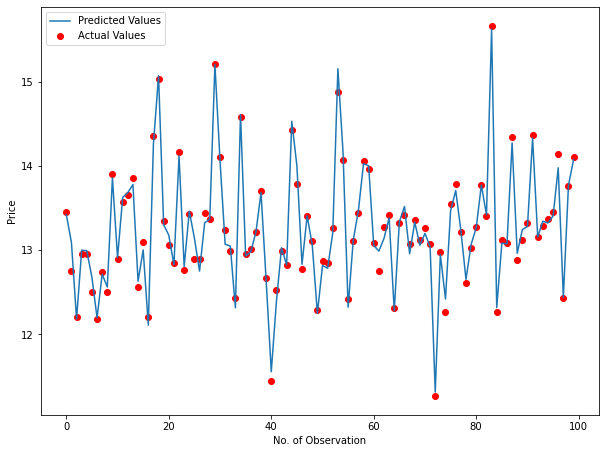

In [652]:
plt.figure(figsize=(10,7.5))
index_array = random.sample(list(y_test.index), 100)
y_test_g = [y_test[i] for i in index_array]
y_pred2_g = [y_pred2_dict[i] for i in index_array]
#plt.plot(x_g[:100],y_test_g)
plt.scatter(x_g[:100],y_test_g, color = "red")
plt.plot(x_g[:100],y_pred2_g)
plt.legend(["Predicted Values","Actual Values"])
plt.xlabel("No. of Observation")
plt.ylabel("Price")
plt.show

In [713]:
X = data_pf.drop("Price",axis=1)
y = data_pf["Price"]

In [714]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=rfr_index)

In [715]:
f_model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [716]:
y_pred = f_model.predict(X_test)
r2_score(y_pred,y_test)

0.9846642000124649

In [717]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

115447.56931639006

In [718]:
scores = cross_val_score(f_model, X_train, y_train, scoring='r2', cv=k_fold)
scores

array([0.86523773, 0.90895037, 0.94726675, 0.9363091 , 0.97479914,
       0.98094382, 0.95571775, 0.98868973, 0.96461281, 0.96588328])

In [719]:
print(np.mean(scores),np.std(scores))


0.9488410473885913 0.03552339082853093


In [720]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(f_model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


MAE: -52332.507 (4866.893)


In [721]:
results = cross_val_score(f_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))


MSE: -25202048048.253 (11923600820.166)


In [722]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

115447.56931639006
49026.032822425135
0.06738609109561139
